In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings

### Functions

In [3]:
def PCA():
    ############ Points of the pca #############
    lmin_=350
    lmax_=650

    Ponto0=np.array([132,-287])
    xmax=281
    ymax=-343
    pc1_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])
    pc1_y= - np.array([295., 296, 299, 309, 325, 335, 338, 342, 340, 330, 319, 318, 315 ])

    pc2_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])
    pc2_y= - np.array([322., 316, 317, 335, 342, 339, 319, 281, 250, 241, 243, 247, 244 ])
    
    pc3_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])     # PC3
    pc3_y= - np.array([343, 327, 313, 303, 285, 274, 269, 272, 275, 287, 304, 309, 313 ])
    
#     pc3_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])   # PC2 Shifted
#     pc3_y= - np.array([317., 335, 342, 339, 319, 281, 250, 241, 243, 247, 244, 244, 244 ])
    
    pc1=np.array((pc1_x, pc1_y))
    pc2=np.array((pc2_x, pc2_y))
    pc3=np.array((pc3_x, pc3_y))
    
    pc1[0,:]=pc1[0,:]-Ponto0[0]
    pc1[1,:]=-pc1[1,:]+Ponto0[1]
    pc2[0,:]=pc2[0,:]-Ponto0[0]
    pc2[1,:]=-pc2[1,:]+Ponto0[1]
    pc3[0,:]=pc3[0,:]-Ponto0[0]
    pc3[1,:]=-pc3[1,:]+Ponto0[1]
    
    pc1[1,:]=((pc1[1,:])/(-ymax+Ponto0[1]))
    pc1[0,:]=((pc1[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    pc2[1,:]=((pc2[1,:])/(-ymax+Ponto0[1]))
    pc2[0,:]=((pc2[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    pc3[1,:]=((pc3[1,:])/(-ymax+Ponto0[1]))
    pc3[0,:]=((pc3[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    
#     plt.plot(pc1[0,:],pc1[1,:],color='r')
#     plt.plot(pc2[0,:],pc2[1,:],color='g')
#     plt.plot(pc3[0,:],pc3[1,:],color='b')
    
    return pc1, pc2, pc3

In [224]:
def Sens_curves_pixels(combination): # case: 0 Dichromatic, 1 Mono-UV, 2 Mono-Green.
    
    ############ Points of the sensitivity curves #############
    lmin_=350
    lmax_=650
    
    Ponto0=np.array([131,272])
    xmax=306
    ymax=206

    Red_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Red_y=np.array([237., 238, 241, 244, 241, 232, 219, 210, 206, 209, 220, 238, 257 ])
    
    Green_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Green_y=np.array([232., 233, 230, 218, 210, 206, 212, 225, 247, 266, 271, 271, 271 ])
    
    Blue_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Blue_y=np.array([231., 226, 213, 205, 211, 229, 256, 269, 271, 271, 271, 271, 271 ])

    if combination==0: # Red-Green
        Red=np.array((Red_x, Red_y))
        Green=np.array([Green_x, Green_y])
    if combination==1:  # Red-Blue
        Red=np.array((Red_x, Red_y))
        Green=np.array([Blue_x, Blue_y])
    if combination==2:  # Green-Blue
        Red=np.array((Green_x, Green_y))
        Green=np.array([Blue_x, Blue_y])
    
    Red[0,:]=Red[0,:]-Ponto0[0]
    Red[1,:]=-Red[1,:]+Ponto0[1]
    Green[0,:]=Green[0,:]-Ponto0[0]
    Green[1,:]=-Green[1,:]+Ponto0[1]
    
    Red[1,:]=((Red[1,:])/(-ymax+Ponto0[1]))
    Red[0,:]=((Red[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    Green[1,:]=((Green[1,:])/(-ymax+Ponto0[1]))
    Green[0,:]=((Green[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    
    
    return Red, Green

In [4]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 13
        raw = np.loadtxt("Codes_experimental_data/Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 30
        fit = np.loadtxt("Codes_experimental_data/Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Codes_experimental_data/Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)
    

In [5]:
def f(Y,WRH, WHG, WGH, WHR, Lambda1, Lambda2, Ir, Ig):
    y1, y2 = Y
    return [ -y1 + Ir + (Lambda1 - WRH*WHG)*np.tanh(y2) - WRH*WHR*np.tanh(y1) , -y2 + Ig + (Lambda2 - WGH*WHR)*np.tanh(y1) - WGH*WHG*np.tanh(y2) ]

In [6]:
def hr(Ig, Ir, WRH, WHG, WGH, WHR, Lambda):
    return ((Lambda - WRH*WHG)*Ig + (1 + WGH*WHG)*Ir)/((1 + WGH*WHG)*(1 + WRH*WHR) - (Lambda - WGH*WHR + np.spacing(1))*(Lambda - WRH*WHG + np.spacing(1)))

def hg(Ig, Ir, WRH, WHG, WGH, WHR, Lambda):
    return (Ig/(1 + WGH*WHG)) + ((Lambda - WGH*WHR)/(1 + WGH*WHG))*(((Lambda-WRH*WHG)*Ig + (1+WGH*WHG)*Ir)/((1+WGH*WHG)*(1+WRH*WHR)-(Lambda-WGH*WHR + np.spacing(1))*(Lambda-WRH*WHG + np.spacing(1))))

In [7]:
def Plots_ParamsDistribution():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    Combination = 1
    idx_current = 4
    N_fixed_points = np.array(np.loadtxt("Data/Fixed_points/SensCurves_ExpData/Dichro_N_FixedPoints_MultipleFixedPoints_Combination_"+str(Combination)+"_CurrentIndex_"+str(idx_current)+".txt"), dtype=int)
    Params = np.loadtxt("Data/Fixed_points/SensCurves_ExpData/Dichro_Params_MultipleFixedPoints_Combination_"+str(Combination)+"_CurrentIndex_"+str(idx_current)+".txt")
    Params = np.reshape(Params, (int(Params.size/6), 6))
    
    idx_three = np.where(N_fixed_points == 3)[0]
    array = np.linspace(0,2.5,200)
    
    kernel = scipy.stats.gaussian_kde(Params[idx_three,1])
    dist_1 = kernel(array)
    kernel = scipy.stats.gaussian_kde(Params[idx_three,2])
    dist_2 = kernel(array)
    kernel = scipy.stats.gaussian_kde(Params[idx_three,3])
    dist_3 = kernel(array)
    kernel = scipy.stats.gaussian_kde(Params[idx_three,4])
    dist_4 = kernel(array)
    kernel = scipy.stats.gaussian_kde(Params[idx_three,5])
    dist_5 = kernel(array)

    return array, dist_1, dist_2, dist_3, dist_4, dist_5 

## Figure 1
### PCA and Opsin sensitivity curves AND Number of fixed points -  dichromatic

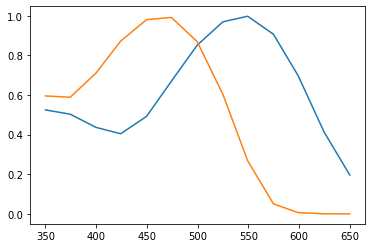

In [5]:
Combination = 0
option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.

if Combination == 0:
    L, R, G, _, _ = Sens_curves(option_opsins) # Red and Green combination
if Combination == 1:
    L, R, _, G, _ = Sens_curves(option_opsins) # Red and Blue combination
if Combination == 2:
    L, _, R, G, _ = Sens_curves(option_opsins) # Red and Green combination
    

plt.plot(L,R)
plt.plot(L,G)

In [9]:
Combination = 2

option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
LL, RR, GG, BB, UU = Sens_curves(option_opsins) # Red and Green combination
option_opsins = 2 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
LL_, RR_, GG_, BB_, UU_ = Sens_curves(option_opsins) # Red and Green combination

if Combination == 0:
    option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
    L, R, G, _, _ = Sens_curves(option_opsins) # Red and Green combination
    option_opsins = 2 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
    L_, R_, G_, _, _ = Sens_curves(option_opsins) # Red and Green combination
if Combination == 1:
    option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
    L, R, G, _, _ = Sens_curves(option_opsins) # Red and Green combination
    option_opsins = 2 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
    L_, R_, _, G_, _ = Sens_curves(option_opsins) # Red and Green combination
if Combination == 2:
    option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
    L, R, G, _, _ = Sens_curves(option_opsins) # Red and Green combination
    option_opsins = 2 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
    L_, _, R_, G_, _ = Sens_curves(option_opsins) # Red and Green combination
    
PC1,PC2,PC3 = PCA()

Ir_=R
Ig_=G

if Combination==0:
    WHR=[0.5, 0.1]
    WRH=[0.5, 0.1]
    WGH=[0.7, 0.1]
    WHG=[0.7, 0.3]
    alpha1=[0, 2.3]
    alpha2=[0, 2.3]
    Ir=[ Ir_[3] , Ir_[3] ]
    Ig=[ Ig_[3] , Ig_[3] ]
    
    
if Combination==1:
    WHR=[0.2, 0.1]
    WRH=[0.2, 0.1]
    WGH=[0.2, 0.2]
    WHG=[0.3, 0.3]
    alpha1=[0, 2.4]
    alpha2=[0, 2.3]
    Ir=[ Ir_[8] , Ir_[5] ]
    Ig=[ Ir_[3] , Ig_[4] ]
    
if Combination==2:
    WHR=[0.5, 0.1]
    WRH=[0.2, 0.1]
    WGH=[0.7, 0.2]
    WHG=[0.8, 0.3]
    alpha1=[0, 2.7]
    alpha2=[0, 2.8]
    Ir=[ Ir_[2] , Ir_[5] ]
    Ig=[ Ir_[3] , Ig_[4] ]

y1 = np.linspace(-5.0, 5.0, 22)
y2 = np.linspace(-5.0, 5.0, 22)
Y1, Y2 = np.meshgrid(y1, y2)
Z1, Z2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
w, o = np.zeros(Z1.shape), np.zeros(Z2.shape)

NI, NJ = Y1.shape
NI2, NJ2 = Z1.shape


for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], WRH[0], WHG[0], WGH[0], WHR[0], alpha1[0], alpha2[0], Ir[0], Ig[0])
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        
for i in range(NI):
    for j in range(NJ):
        x = Z1[i, j]
        y = Z2[i, j]
        yprime = f([x, y], WRH[1], WHG[1], WGH[1], WHR[1], alpha1[1], alpha2[1], Ir[1], Ig[1])
        w[i,j] = yprime[0]
        o[i,j] = yprime[1]
        

        
N_h=10000
hr=np.linspace(-4,4,N_h)
hg=np.linspace(-4,4,N_h)
Null_green=np.arctanh((Ir[0]-(WRH[0]*WHR[0])*np.tanh(hr)-hr)/(WRH[0]*WHG[0]-alpha1[0] + np.spacing(1)))  # Null green = hg
Null_red=np.arctanh((Ig[0]-(WGH[0]*WHG[0])*np.tanh(hg)-hg)/(WGH[0]*WHR[0]-alpha2[0] + np.spacing(1)))    # Null red = hr

Null_green2=np.arctanh((Ir[1]-(WRH[1]*WHR[1])*np.tanh(hr)-hr)/(WRH[1]*WHG[1]-alpha1[1] + np.spacing(1)))  # Null green = hg
Null_red2=np.arctanh((Ig[1]-(WGH[1]*WHG[1])*np.tanh(hg)-hg)/(WGH[1]*WHR[1]-alpha2[1] + np.spacing(1)))    # Null red = hr

#-------- distributions of coupling parameters for three fixed points


array, d1, d2, d3, d4, d5 = Plots_ParamsDistribution()


/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in arctanh
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in arctanh
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in arctanh
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in arctanh


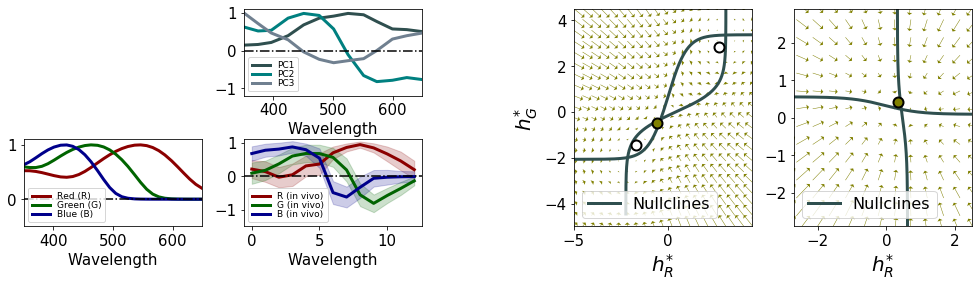

In [21]:
# fig=plt.figure(figsize=(20,7.0))
fig=plt.figure(figsize=(17,4.))

grid = plt.GridSpec(2, 9, wspace=0.6, hspace=0.5)
grid2 = plt.GridSpec(2, 9, wspace=0.6, hspace=0.5)

p1=fig.add_subplot(grid2[1,:2])
p2=fig.add_subplot(grid2[1,2:4])
p5=fig.add_subplot(grid2[0,2:4])
p3=fig.add_subplot(grid[:,5:7])
p4=fig.add_subplot(grid[:,7:])
# p41=fig.add_subplot(grid2[0,1])
# p42=fig.add_subplot(grid2[0,2])

##### Plot opsins_HCblock + PCA + opsins_functional

Red_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinR.txt")
Green_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinG.txt")
Blue_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinB.txt")
UV_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinU.txt")

sns.lineplot(ax = p2, x=Red_ops[0,:],y=Red_ops[1,:]/np.max(Red_ops[1,:]),color = 'darkred', linewidth = 3, ci='sd', label='R (in vivo)')
sns.lineplot(ax = p2, x=Green_ops[0,:],y=(Green_ops[1,:]/np.max(Green_ops[1,:])),color = 'darkgreen', linewidth = 3, ci='sd', label='G (in vivo)')
sns.lineplot(ax = p2, x=Blue_ops[0,:],y=(Blue_ops[1,:]/ np.max(Blue_ops[1,:])),color = 'darkblue', linewidth = 3, ci='sd', label='B (in vivo)')
# sns.lineplot(ax = p2, x=UV_ops[0,:],y=UV_ops[1,:]/ np.max(UV_ops[1,:]),color = 'purple', linewidth = 3)

# p2.plot(LL_,RR_,color='darkred',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='R (in vivo)',linewidth = '3')
# p2.plot(LL_,GG_,color='darkgreen',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='G (in vivo)',linewidth = '3')
# p2.plot(LL_,BB_,color='darkblue',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='B (in vivo)',linewidth = '3')
p2.axhline(y=0,color='k',linestyle='-.')
p2.set_xlabel("Wavelength",fontsize=15)
# p2.set_ylabel("Functional ops",fontsize=20)
p2.tick_params(labelsize=15)
p2.legend(fontsize=9,handleheight=0.1, labelspacing=0.006)
p2.set_ylim(-1.5,1.1) 

# p2.set_yticklabels([])

p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label='Red (R)',linewidth = 3)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',label='Green (G)',linewidth = 3)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label='Blue (B)',linewidth = 3)
p1.set_xlabel("Wavelength",fontsize=15)
# p1.set_ylabel("Sens. functions",fontsize=19)
p1.tick_params(labelsize=15)
p1.axhline(y=0,color='k',linestyle='-.')
p1.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006)
# p1.set_ylim(0,1.1)
p1.set_ylim(-0.5, 1.1)
p1.set_xlim(350,650)

p5.plot(PC1[0,:],PC1[1,:],color='darkslategray',marker='o',markerfacecolor='none',markersize='0',label='PC1',linewidth = 3)
p5.plot(PC2[0,:],PC2[1,:],color='teal',marker='o',markerfacecolor='none',markersize='0',label='PC2',linewidth = 3)
p5.plot(PC3[0,:],PC3[1,:],color='slategray',marker='o',markerfacecolor='none',markersize='0',label='PC3',linewidth = 3)
p5.axhline(y=0,color='k',linestyle='-.')
p5.set_xlabel("Wavelength",fontsize=15)
# p5.set_ylabel("Sens. functions",fontsize=19)
p5.tick_params(labelsize=15)
p5.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006)
# p5.set_ylim(0,1.1)
p5.set_ylim(-1.2,1.1)
p5.set_xlim(350,650)
# p5.set_yticklabels([])

#### Ploting Fixed points

Q = p4.quiver(Y1, Y2, u, v, color='olive', headwidth = 11, scale = 45)

# p3.set_xlim([-1, 1])
# p3.set_ylim([-1, 1])

p4.plot(Null_red,hg,color='darkslategray',label='Nullclines',linewidth=3)
p4.plot(hr,Null_green,color='darkslategray',linewidth=3)
p4.tick_params(labelsize=15)
p4.set_xlabel(r"$h_{R}^{*}$",fontsize='20')
# p4.set_ylabel(r"$h_{G}^{*}$",fontsize='20')
p4.legend(fontsize=16,loc=3)
p4.set_xlim(-2.7,2.5)
p4.set_ylim(-2.9,2.9)
# p4.set_xlim(-3.45,3.45)  #Combination 0
# p4.set_ylim(-3.35,3.35)
# p4.plot(np.arra.35]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2) #Combination 0 
p4.plot(np.array([0.35]),np.array([0.41]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2) #Combination 1

Q2 = p3.quiver(Z1, Z2, w, o, color='olive', headwidth = 11, scale = 135)

p3.plot(Null_red2,hg,color='darkslategray',label='Nullclines',linewidth=3)
p3.plot(hr,Null_green2,color='darkslategray',linewidth=3)
p3.tick_params(labelsize=15)
p3.set_xlabel(r"$h_{R}^{*}$",fontsize='20')
p3.set_ylabel(r"$h_{G}^{*}$",fontsize='20')
p3.legend(fontsize=16,loc=3)
p3.plot(np.array([-1.6871,  2.7343]),np.array([-1.4554, 2.8463]),marker='o',markersize='10',markerfacecolor='white',color='k',markeredgewidth=2,linestyle='none')
p3.plot(np.array([-0.5546]),np.array([-0.4832]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2,linestyle='none')
# p3.plot(np.array([-1.5371,  2.7343]),np.array([-1.4554, 2.8463]),marker='o',markersize='10',markerfacecolor='white',color='k',markeredgewidth=2,linestyle='none') #Combination 0
# p3.plot(np.array([-0.5246]),np.array([-0.4832]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2,linestyle='none') #Combination 0



p3.set_xlim(-5,4.5)
p3.set_ylim(-5,4.5)
# p3.plot(np.array([-0.43]),np.array([-0.7]),marker='o',markersize='12',markerfacecolor='none',color='b',markeredgewidth=2)
# p3.plot(np.array([-0.7]),np.array([-1.03]),marker='o',markersize='12',markerfacecolor='none',color='b',markeredgewidth=2)

# p41.set_yticklabels([])
# p42.set_yticklabels([])
# p41.plot(array, d1, label='$W_{RH}$', color='darkcyan')
# p41.plot(array, d2, label='$W_{HR}$', color='magenta')
# p41.plot(array, d3, label='$W_{GH}$')
# p41.plot(array, d4, label='$W_{HG}$')
# p42.plot(array, d5, label='$W_{RG}$',color='purple')
# p41.tick_params(labelsize = 15)
# p42.tick_params(labelsize = 15)
# p41.set_ylabel("Prob. density", fontsize = 15)
# # p42.set_ylabel("Prob. density", fontsize = 19)
# p41.set_xlabel("Strength", fontsize = 15)
# p42.set_xlabel("Strength", fontsize = 15)
# p41.margins(x=0,y=0.1)
# p42.margins(x=0,y=0)
# p41.legend(fontsize=11)
# p42.legend(fontsize=11)

# plt.savefig("Plots/Opsin+PCA+FixedPoints_3.pdf",bbox_inches = 'tight', pad_inches = 0)
# plt.savefig("Plots/Opsin+PCA+FixedPoints_2_combination1.pdf",bbox_inches = 'tight', pad_inches = 0)




### Suplementary FIG

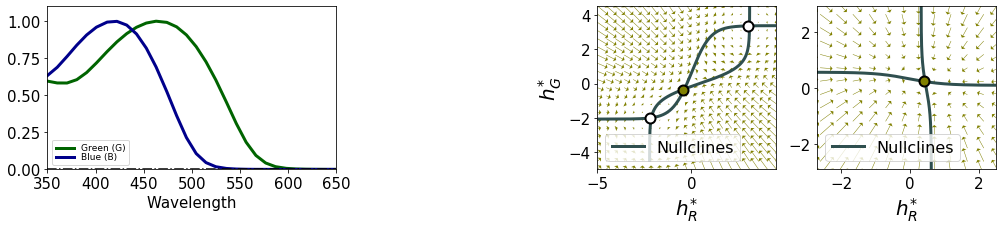

In [117]:
# fig=plt.figure(figsize=(20,7.0))
fig=plt.figure(figsize=(17,3.))

grid = plt.GridSpec(2, 9, wspace=0.6, hspace=0.5)
grid2 = plt.GridSpec(2, 9, wspace=0.6, hspace=0.5)

p1=fig.add_subplot(grid2[:,:3])
# p2=fig.add_subplot(grid2[1,2:4])
# p5=fig.add_subplot(grid2[0,2:4])
p3=fig.add_subplot(grid[:,5:7])
p4=fig.add_subplot(grid[:,7:])
# p41=fig.add_subplot(grid2[0,1])
# p42=fig.add_subplot(grid2[0,2])

##### Plot opsins_HCblock + PCA + opsins_functional

# p2.plot(LL_,RR_,color='darkred',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='R (in vivo)',linewidth = '3')
# # p2.plot(LL_,GG_,color='darkgreen',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='G (in vivo)',linewidth = '3')
# p2.plot(LL_,BB_,color='darkblue',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='B (in vivo)',linewidth = '3')
# p2.axhline(y=0,color='k',linestyle='-.')
# p2.set_xlabel("Wavelength",fontsize=15)
# # p2.set_ylabel("Functional ops",fontsize=20)
# p2.tick_params(labelsize=15)
# p2.legend(fontsize=9,handleheight=0.1, labelspacing=0.006)
# p2.set_ylim(-1.5,1.1) 

# p2.set_yticklabels([])

# p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label='Red (R)',linewidth = 3)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',label='Green (G)',linewidth = 3)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label='Blue (B)',linewidth = 3)
p1.set_xlabel("Wavelength",fontsize=15)
# p1.set_ylabel("Sens. functions",fontsize=19)
p1.tick_params(labelsize=15)
p1.axhline(y=0,color='k',linestyle='-.')
p1.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006)
# p1.set_ylim(0,1.1)
p1.set_ylim(-0, 1.1)
p1.set_xlim(350,650)

# p5.plot(PC1[0,:],PC1[1,:],color='darkslategray',marker='o',markerfacecolor='none',markersize='0',label='PC1',linewidth = 3)
# p5.plot(PC2[0,:],PC2[1,:],color='teal',marker='o',markerfacecolor='none',markersize='0',label='PC2',linewidth = 3)
# p5.plot(PC3[0,:],PC3[1,:],color='slategray',marker='o',markerfacecolor='none',markersize='0',label='PC3',linewidth = 3)
# p5.axhline(y=0,color='k',linestyle='-.')
# p5.set_xlabel("Wavelength",fontsize=15)
# # p5.set_ylabel("Sens. functions",fontsize=19)
# p5.tick_params(labelsize=15)
# p5.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006)
# # p5.set_ylim(0,1.1)
# p5.set_ylim(-1.2,1.1)
# p5.set_xlim(350,650)
# # p5.set_yticklabels([])

#### Ploting Fixed points

Q = p4.quiver(Y1, Y2, u, v, color='olive', headwidth = 11, scale = 45)

# p3.set_xlim([-1, 1])
# p3.set_ylim([-1, 1])

p4.plot(Null_red,hg,color='darkslategray',label='Nullclines',linewidth=3)
p4.plot(hr,Null_green,color='darkslategray',linewidth=3)
p4.tick_params(labelsize=15)
p4.set_xlabel(r"$h_{R}^{*}$",fontsize='20')
# p4.set_ylabel(r"$h_{G}^{*}$",fontsize='20')
p4.legend(fontsize=16,loc=3)
p4.set_xlim(-2.7,2.5)
p4.set_ylim(-2.9,2.9)
# p4.set_xlim(-3.45,3.45)  #Combination 0
# p4.set_ylim(-3.35,3.35)
# p4.plot(np.array([0.26]),np.array([0.35]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2) #Combination 0 
# p4.plot(np.array([0.35]),np.array([0.41]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2) #Combination 1
p4.plot(np.array([0.4]),np.array([0.26]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2) #Combination 2


Q2 = p3.quiver(Z1, Z2, w, o, color='olive', headwidth = 11, scale = 135)

p3.plot(Null_red2,hg,color='darkslategray',label='Nullclines',linewidth=3)
p3.plot(hr,Null_green2,color='darkslategray',linewidth=3)
p3.tick_params(labelsize=15)
p3.set_xlabel(r"$h_{R}^{*}$",fontsize='20')
p3.set_ylabel(r"$h_{G}^{*}$",fontsize='20')
p3.legend(fontsize=16,loc=3)
p3.plot(np.array([-2.1871,  2.9943]),np.array([-1.9954, 3.3463]),marker='o',markersize='10',markerfacecolor='white',color='k',markeredgewidth=2,linestyle='none')
p3.plot(np.array([-0.4546]),np.array([-0.3832]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2,linestyle='none')
# p3.plot(np.array([-1.6871,  2.7343]),np.array([-1.4554, 2.8463]),marker='o',markersize='10',markerfacecolor='white',color='k',markeredgewidth=2,linestyle='none') #Combination 1
# p3.plot(np.array([-0.5546]),np.array([-0.4832]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2,linestyle='none') #Combination 1
# p3.plot(np.array([-1.5371,  2.7343]),np.array([-1.4554, 2.8463]),marker='o',markersize='10',markerfacecolor='white',color='k',markeredgewidth=2,linestyle='none') #Combination 0
# p3.plot(np.array([-0.5246]),np.array([-0.4832]),marker='o',markersize='10',markerfacecolor='olive',color='k',markeredgewidth=2,linestyle='none') #Combination 0



p3.set_xlim(-5,4.5)
p3.set_ylim(-5,4.5)
# p3.plot(np.array([-0.43]),np.array([-0.7]),marker='o',markersize='12',markerfacecolor='none',color='b',markeredgewidth=2)
# p3.plot(np.array([-0.7]),np.array([-1.03]),marker='o',markersize='12',markerfacecolor='none',color='b',markeredgewidth=2)

# p41.set_yticklabels([])
# p42.set_yticklabels([])
# p41.plot(array, d1, label='$W_{RH}$', color='darkcyan')
# p41.plot(array, d2, label='$W_{HR}$', color='magenta')
# p41.plot(array, d3, label='$W_{GH}$')
# p41.plot(array, d4, label='$W_{HG}$')
# p42.plot(array, d5, label='$W_{RG}$',color='purple')
# p41.tick_params(labelsize = 15)
# p42.tick_params(labelsize = 15)
# p41.set_ylabel("Prob. density", fontsize = 15)
# # p42.set_ylabel("Prob. density", fontsize = 19)
# p41.set_xlabel("Strength", fontsize = 15)
# p42.set_xlabel("Strength", fontsize = 15)
# p41.margins(x=0,y=0.1)
# p42.margins(x=0,y=0)
# p41.legend(fontsize=11)
# p42.legend(fontsize=11)

plt.savefig("Plots/Opsin+PCA+FixedPoints_2_combination2.pdf",bbox_inches = 'tight', pad_inches = 0)





[]

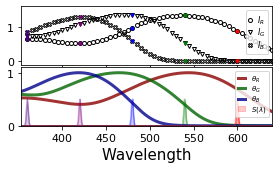

In [25]:
fig = plt.figure(figsize=(4.5,2.2))
grid = plt.GridSpec(4, 1, wspace=0.1, hspace=0.1)
p2 = fig.add_subplot(grid[:2,:])
p1 = fig.add_subplot(grid[2:,:])

N_points = 300
fit = np.loadtxt("Codes_experimental_data/Data/Opsins_fit.txt")
idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
LL = fit[-1,idx]
RR = fit[0,idx]
GG = fit[1,idx]
BB = fit[2,idx]
UV = fit[3,idx]

Ir = 0
Ig = 0
Il = 0
Ib = 0
for l0 in range(360, 650, 5):
    sigma = 1
    Z_norm = 1/(sigma*np.sqrt(2*np.pi))
    x_array = np.linspace(350,650,300) 
    G_pulse = 0.5*np.exp(-(x_array-l0)**2/(2*(sigma**2)))/np.max( np.exp(-(x_array-l0)**2/(2*(sigma**2))) )
    Ir = np.append(Ir, np.sum(RR*G_pulse))
    Ig = np.append(Ig, np.sum(GG*G_pulse))
    Ib = np.append(Ib, np.sum(BB*G_pulse))
    Il = np.append(Il, l0)
  
Colors = ['indigo','purple', 'blue', 'green', 'red']
counter = -1

p2.plot(Il[1:], Ir[1:], marker='o', color='k', markersize='4', label=r'$I_{R}$', linestyle='none', markerfacecolor='none')
p2.plot(Il[1:], Ig[1:], marker='v', color='k', markersize='4', label=r'$I_{G}$', linestyle='none', markerfacecolor='none')
p2.plot(Il[1:], Ib[1:], marker='X', color='k', markersize='4', label=r'$I_{B}$', linestyle='none', markerfacecolor='none')
p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label=r'$\theta_{R}$',linewidth = 3, linestyle = '-', alpha = 0.8)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',label=r'$\theta_{G}$',linewidth = 3, linestyle = '-', alpha = 0.8)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label=r'$\theta_{B}$',linewidth = 3, linestyle = '-', alpha = 0.8)
for l0 in range(360, 650, 60):
    counter+=1
    sigma = 1
    Z_norm = 1/(sigma*np.sqrt(2*np.pi))
    x_array = np.linspace(350,650,300) 
    G_pulse = 0.5*np.exp(-(x_array-l0)**2/(2*(sigma**2)))/np.max( np.exp(-(x_array-l0)**2/(2*(sigma**2))) )
    p1.plot(x_array, G_pulse, color=Colors[counter], alpha=0.4)
    p1.fill_between(x_array, G_pulse, color=Colors[counter], alpha=0.2)
    p2.plot(np.array([l0]), np.array([np.sum(RR*G_pulse)]), marker='o', color=Colors[counter], markersize='3')
    p2.plot(np.array([l0]), np.array([np.sum(GG*G_pulse)]), marker='v', color=Colors[counter], markersize='3')
    p2.plot(np.array([l0]), np.array([np.sum(BB*G_pulse)]), marker='v', color=Colors[counter], markersize='3')
#     p2.axvline(x=l0, linestyle=':', color=Colors[counter], alpha=0.2)
#     p1.axvline(x=l0, linestyle=':', color=Colors[counter], alpha=0.2)
p1.fill_between(x_array, G_pulse, color=Colors[counter], alpha=0.2, label=r'$S(\lambda)$')    
# p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label='Blue (B)',linewidth = 3)
p1.set_xlabel("Wavelength",fontsize=15)
# p1.set_ylabel("Sens. functions",fontsize=19)
p1.tick_params(labelsize=11)
p1.legend(fontsize=7,ncol=1, labelspacing=0.0006, loc=1, columnspacing = 0.12, handlelength = 1)
p1.set_ylim(0,1.1)
# p1.set_ylim(-0, 1.1)
p1.set_xlim(353,640)

p2.legend(fontsize=8, ncol=1, labelspacing=0.0001, loc=1, columnspacing = 0.4, handlelength = 0.1)
p2.set_ylim(-0.1,1.6)
p2.set_xlim(353,640)
p2.tick_params(labelsize=11)
p2.set_xticklabels([])

# plt.savefig("Plots/Fig1_currents.pdf")

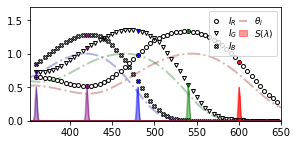

In [67]:
fig, p1 = plt.subplots(1, figsize=(4.5,2.1))
# grid = plt.GridSpec(4, 1, wspace=0.1, hspace=0.1)
# p2 = fig.add_subplot(grid[:2,:])
# p1 = fig.add_subplot(grid[2:,:])

N_points = 300
fit = np.loadtxt("Codes_experimental_data/Data/Opsins_fit.txt")
idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
LL = fit[-1,idx]
RR = fit[0,idx]
GG = fit[1,idx]
BB = fit[2,idx]
UV = fit[3,idx]

Ir = 0
Ig = 0
Il = 0
Ib = 0
for l0 in range(360, 650, 5):
    sigma = 1
    Z_norm = 1/(sigma*np.sqrt(2*np.pi))
    x_array = np.linspace(350,650,300) 
    G_pulse = 0.5*np.exp(-(x_array-l0)**2/(2*(sigma**2)))/np.max( np.exp(-(x_array-l0)**2/(2*(sigma**2))) )
    Ir = np.append(Ir, np.sum(RR*G_pulse))
    Ig = np.append(Ig, np.sum(GG*G_pulse))
    Ib = np.append(Ib, np.sum(BB*G_pulse))
    Il = np.append(Il, l0)
  
Colors = ['indigo','purple', 'blue', 'green', 'red']
counter = -1

p1.plot(Il[1:], Ir[1:], marker='o', color='k', markersize='4', label=r'$I_{R}$', linestyle='none', markerfacecolor='none')
p1.plot(Il[1:], Ig[1:], marker='v', color='k', markersize='4', label=r'$I_{G}$', linestyle='none', markerfacecolor='none')
p1.plot(Il[1:], Ib[1:], marker='X', color='k', markersize='4', label=r'$I_{B}$', linestyle='none', markerfacecolor='none')
p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label=r'$\theta_{i}$',linewidth = 2, linestyle = '-.', alpha = 0.3)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',linewidth = 2, linestyle = '-.', alpha = 0.3)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',linewidth = 2, linestyle = '-.', alpha = 0.3)
for l0 in range(360, 650, 60):
    counter+=1
    sigma = 1
    Z_norm = 1/(sigma*np.sqrt(2*np.pi))
    x_array = np.linspace(350,650,300) 
    G_pulse = 0.5*np.exp(-(x_array-l0)**2/(2*(sigma**2)))/np.max( np.exp(-(x_array-l0)**2/(2*(sigma**2))) )
    p1.plot(x_array, G_pulse, color=Colors[counter], alpha=0.4)
    p1.fill_between(x_array, G_pulse, color=Colors[counter], alpha=0.4)
    p1.plot(np.array([l0]), np.array([np.sum(RR*G_pulse)]), marker='o', color=Colors[counter], markersize='2')
    p1.plot(np.array([l0]), np.array([np.sum(GG*G_pulse)]), marker='v', color=Colors[counter], markersize='2')
    p1.plot(np.array([l0]), np.array([np.sum(BB*G_pulse)]), marker='X', color=Colors[counter], markersize='2')
#     p2.axvline(x=l0, linestyle=':', color=Colors[counter], alpha=0.2)
#     p1.axvline(x=l0, linestyle=':', color=Colors[counter], alpha=0.2)
p1.fill_between(x_array, G_pulse, color=Colors[counter], alpha=0.4, label=r'$S(\lambda)$')    
# p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label='Blue (B)',linewidth = 3)
# p1.set_xlabel("Wavelength",fontsize=15)
# p1.set_ylabel("Sens. functions",fontsize=19)
p1.tick_params(labelsize=11)
p1.legend(fontsize=7,ncol=1, labelspacing=0.0006, loc=1, columnspacing = 0.12, handlelength = 1)
p1.set_ylim(0,1.1)
# p1.set_ylim(-0, 1.1)
p1.set_xlim(353,640)

p1.legend(fontsize=9, ncol=2, labelspacing=0.00001, loc=1, columnspacing = 0.2, handlelength = 0.9)
p1.set_ylim(-0.,1.7)
p1.set_xlim(353,650)
p1.tick_params(labelsize=10)
# p1.set_xticklabels([])

plt.savefig("Plots/Fig1_currents_2.pdf")

## Figure 2

### Descent gradient

In [255]:
def Load_data_fig2(Param_string, Combination):
    string = ['FuncionalOpsins', 'PCA']
    Colors = ['purple', 'olive', 'deeppink', 'dodgerblue', 'orangered']

    par_connections = 0
    L_array = np.loadtxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hr_learned= np.loadtxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hg_learned= np.loadtxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    L = np.loadtxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h1_true = np.loadtxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h2_true = np.loadtxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    Params = np.loadtxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")

    par_connections = 1
    L_array_ = np.loadtxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hr_learned_ = np.loadtxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    hg_learned_ = np.loadtxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    L_ = np.loadtxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h1_true_ = np.loadtxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    h2_true_ = np.loadtxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    Params_ = np.loadtxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_combination_"+str(Combination)+".txt")
    
    return L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_

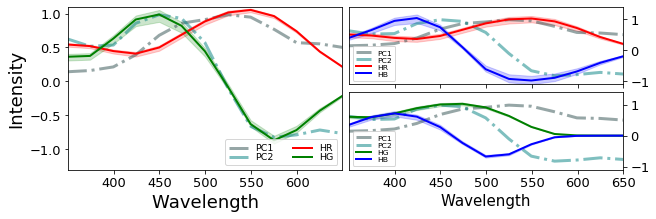

In [262]:
string = ['FuncionalOpsins', 'PCA']

fig = plt.figure(figsize=(15,3))
grid = plt.GridSpec(2, 6, wspace = 0.05 , hspace = 0.1)
p1 = fig.add_subplot(grid[:,:2])
p11 = fig.add_subplot(grid[0,2:4])
p12 = fig.add_subplot(grid[1,2:4])
# p2 = fig.add_subplot(grid[:,3:5])
# p21 = fig.add_subplot(grid[0,5:])
# p22 = fig.add_subplot(grid[1,5:])

#----------------
Param_string = 1

Combination = 0
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
hr_learned = 1.4*hr_learned
hg_learned = 1.6*hg_learned
hr_learned_ = 1.4*hr_learned_
hg_learned_ = 1.6*hg_learned_

# sns.lineplot(x = L_array[1:], y = hr_learned[1:], color='red', ax=p1)
# sns.lineplot(x = L_array[1:], y = hg_learned[1:], color='green', ax=p1)
p1.plot(L, h1_true,color='darkslategray', linestyle='-.', linewidth = 3, label='PC1', alpha=0.5)
p1.plot(L, h2_true,color='teal', linestyle='-.', linewidth = 3, label='PC2', alpha=0.5)
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='red', ax=p1, label='HR', linewidth = 2)
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='green', ax=p1, label='HG', linewidth = 2)

Combination = 1
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
hr_learned = 1.4*hr_learned
hg_learned = 1.6*hg_learned
hr_learned_ = 1.4*hr_learned_
hg_learned_ = 1.6*hg_learned_

# sns.lineplot(x = L_array[1:], y = hr_learned[1:], color='orange', ax=p11)
# sns.lineplot(x = L_array[1:], y = hg_learned[1:], color='orange', ax=p11)
p11.plot(L, h1_true,color='darkslategray', linestyle='-.', linewidth = 3, label='PC1', alpha=0.5)
p11.plot(L, h2_true,color='teal', linestyle='-.', linewidth = 3, label='PC2', alpha=0.5)
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='r', ax=p11, label='HR', linewidth = 2)
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='b', ax=p11, label='HB', linewidth = 2)

Combination = 2
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
hr_learned = 1.4*hr_learned
hg_learned = 1.6*hg_learned
hr_learned_ = 1.4*hr_learned_
hg_learned_ = 1.6*hg_learned_

# sns.lineplot(x = L_array[1:], y = hr_learned[1:], color='orange', ax=p12)
# sns.lineplot(x = L_array[1:], y = hg_learned[1:], color='orange', ax=p12)
p12.plot(L, h1_true,color='darkslategray', linestyle='-.', linewidth = 3, label='PC1', alpha=0.5)
p12.plot(L, h2_true,color='teal', linestyle='-.', linewidth = 3, label='PC2', alpha=0.5)
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='g', ax=p12, label='HG', linewidth = 2)
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='b', ax=p12, label='HB', linewidth = 2)

# # ---------------------
# Param_string = 0

# Combination = 0
# L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
# # hr_learned = 1.4*hr_learned
# # hg_learned = 1.6*hg_learned
# # hr_learned_ = 1.4*hr_learned_
# # hg_learned_ = 1.6*hg_learned_

# sns.lineplot(x = L_array[1:], y = hr_learned[1:], color='orange', ax=p2)
# sns.lineplot(x = L_array[1:], y = hg_learned[1:], color='orange', ax=p2)
# p2.plot(L, h1_true,color='darkred', linestyle='-.', linewidth = 2, label='R(In vivo)')
# p2.plot(L, h2_true,color='darkgreen', linestyle='-.', linewidth = 2, label='G(In vivo)')
# sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='darkorange', ax=p2, label='Fit')
# sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='darkorange', ax=p2)

# Combination = 1
# L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
# # hr_learned = 1.4*hr_learned
# # hg_learned = 1.6*hg_learned
# # hr_learned_ = 1.4*hr_learned_
# # hg_learned_ = 1.6*hg_learned_

# sns.lineplot(x = L_array[1:], y = hr_learned[1:], color='orange', ax=p21)
# sns.lineplot(x = L_array[1:], y = hg_learned[1:], color='orange', ax=p21)
# p21.plot(L, h1_true,color='darkred', linestyle='-.', linewidth = 2, label='R(In vivo)')
# p21.plot(L, h2_true,color='darkgreen', linestyle='-.', linewidth = 2, label='G(In vivo)')
# sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='darkorange', ax=p21, label='Fit')
# sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='darkorange', ax=p21)

# Combination = 2
# L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)
# # hr_learned = 1.4*hr_learned
# # hg_learned = 1.6*hg_learned
# # hr_learned_ = 1.4*hr_learned_
# # hg_learned_ = 1.6*hg_learned_

# sns.lineplot(x = L_array[1:], y = hr_learned[1:], color='orange', ax=p22)
# sns.lineplot(x = L_array[1:], y = hg_learned[1:], color='orange', ax=p22)
# p22.plot(L, h1_true,color='darkred', linestyle='-.', linewidth = 2, label='R(In vivo)')
# p22.plot(L, h2_true,color='darkgreen', linestyle='-.', linewidth = 2, label='G(In vivo)')
# sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='darkorange', ax=p22, label='Fit')
# sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='darkorange', ax=p22)

p11.yaxis.tick_right()
p12.yaxis.tick_right()
p1.set_xlim(350.1, 649)
p11.set_xlim(350.1, 650)
p12.set_xlim(350.1, 650)
p2.set_xlim(350.1, 650)
# p21.set_xlim(350.1, 650)
# p22.set_xlim(350.1, 650)
p1.set_ylim(-1.3, 1.1)
p11.set_ylim(-1.1, 1.4)
p12.set_ylim(-1.1, 1.4)
p2.set_ylim(-1.5, 1.2)
# p21.set_ylim(-1.3, 1.1)
# p22.set_ylim(-1.3, 1.1)
p1.tick_params(labelsize=13)
p11.tick_params('y', labelsize=13)
p12.tick_params('y', labelsize=13)
p11.tick_params('x', labelsize=13)
p12.tick_params('x', labelsize=13)
p2.tick_params(labelsize=13)
# p21.tick_params(labelsize=15)
# p22.tick_params(labelsize=15)
p1.set_xlabel("Wavelength", fontsize='18')
p11.set_xlabel("Wavelength", fontsize='15')
p12.set_xlabel("Wavelength", fontsize='15')
p2.set_xlabel("Wavelength", fontsize='18')
# p21.set_xlabel("Wavelength", fontsize='15')
# p22.set_xlabel("Wavelength", fontsize='15')
p1.set_ylabel("Intensity", fontsize='18')
# p11.set_ylabel("Intensity", fontsize='15')
# p12.set_ylabel("Intensity", fontsize='15')
# p2.set_ylabel("Intensity", fontsize='18')
# p21.set_ylabel("Intensity", fontsize='15')
# p22.set_ylabel("Intensity", fontsize='15')
p11.set_xticklabels([])
# p21.set_xticklabels([])
p1.legend(fontsize='9.5',loc=4, ncol=2, handleheight=0.2, labelspacing=0.006)
p11.legend(fontsize='7.7', loc=3, ncol=1,handleheight=1, labelspacing=0.006)
p12.legend(fontsize='7.7', loc=3, ncol=1, handleheight=1, labelspacing=0.006)
p2.legend(fontsize='10',loc=1)
# p21.legend(fontsize='8')
# p22.legend(fontsize='8')

plt.savefig("Plots/Dicho_Fit_pca+opsins_allcombinations.pdf")


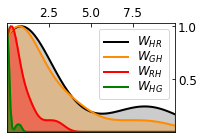

In [106]:
Param_string = 1
Combination = 0
L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)


fig, ax=plt.subplots(figsize=(3,2))
# Colors = ['darkseagreen', 'olive', 'navy', 'purple', 'orangered']
Colors = ['k', 'darkorange', 'r', 'g']
alpha_ = [0.2, 0.3, 0.4, 0.5]
W_label = ['W_{RH}', 'W_{HG}', 'W_{GH}', 'W_{HR}', 'W_{RG}']
counter=-1
for i in np.array([3,2,0,1]):
    counter+=1
    if np.unique(Params[:,i]).size == 1:
        plt.axvline(x = Params[0,i])
        plt.xlim(-1,1)
    else:
        kernel = scipy.stats.gaussian_kde(Params[:,i])
#         x_array = np.linspace(np.min(Params[:,i]), np.max(Params[:,i]), 100)
        x_array = np.linspace(0,10,100)
        dist = kernel(x_array)/np.max(kernel(x_array))
#         plt.plot(x_array, dist, linewidth = 2, label = r'$'+W_label[i]+'$')
#         plt.fill_between(x_array, dist, alpha=alpha_[counter])
        plt.plot(x_array, dist,color=Colors[counter], linewidth = 2, label = r'$'+W_label[i]+'$')
        plt.fill_between(x_array, dist,color=Colors[counter], alpha=alpha_[counter])
        
ax.xaxis.tick_top()
ax.yaxis.tick_right()
plt.xlim(0.001, 9.99)
plt.ylim(0.001,1.03)
plt.tick_params(labelsize=12, direction="in")
# plt.xlabel("Probability density", fontsize=24)
plt.legend(fontsize=12,loc=1, ncol=1, handleheight=0.2, labelspacing=0.006)
# ax.set_yticklabels([])
plt.savefig("Plots/Dichromatic_Inset_distParams.pdf")
plt.show()

# #----------------

# Param_string = 0
# Combination = 0
# L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)

# fig, ax=plt.subplots(figsize=(5,3))
# Colors = ['darkseagreen', 'olive', 'navy', 'purple', 'orangered']
# alpha_ = [0.2, 0.3, 0.5, 0.4]
# W_label = ['W_{RH}', 'W_{HG}', 'W_{GH}', 'W_{HR}', 'W_{RG}']
# counter=-1
# for i in np.array([2,3,1,0]):
#     counter+=1
#     if np.unique(Params[:,i]).size == 1:
#         plt.axvline(x = Params[0,i])
#         plt.xlim(-1,1)
#     else:
#         kernel = scipy.stats.gaussian_kde(Params[:,i])
# #         x_array = np.linspace(np.min(Params[:,i]), np.max(Params[:,i]), 100)
#         x_array = np.linspace(0,10,100)
#         dist = kernel(x_array)/np.max(kernel(x_array))
#         plt.plot(x_array, dist,color=Colors[counter], linewidth = 3, label = r'$'+W_label[i]+'$')
#         plt.fill_between(x_array, dist,color=Colors[counter], alpha=alpha_[counter])
# plt.xlim(0.001, 9.99)
# plt.ylim(0,1.03)
# plt.tick_params(labelsize=24)
# plt.xlabel("Probability density", fontsize=24)
# plt.legend(fontsize=17)
# ax.set_yticklabels([])
# # plt.savefig("Plots/Inset_ParamsStats_FuncOpsins.pdf")
# plt.show()

# Param_string = 0
# L_array, hr_learned, hg_learned, L, h1_true, h2_true, Params, L_array_, hr_learned_, hg_learned_, L_, h1_true_, h2_true_, Params_ = Load_data_fig2(Param_string, Combination)





In [267]:
combination=0

HR_true_, HG_true_ = PCA()
Ir0_, Ig0_ = Sens_curves(combination)

HR_true = HR_true_[1,:]
HG_true = HG_true_[1,:]
Ig0 = Ig0_[1,:]
Ir0 = Ir0_[1,:]

N_currents=Ir0.size


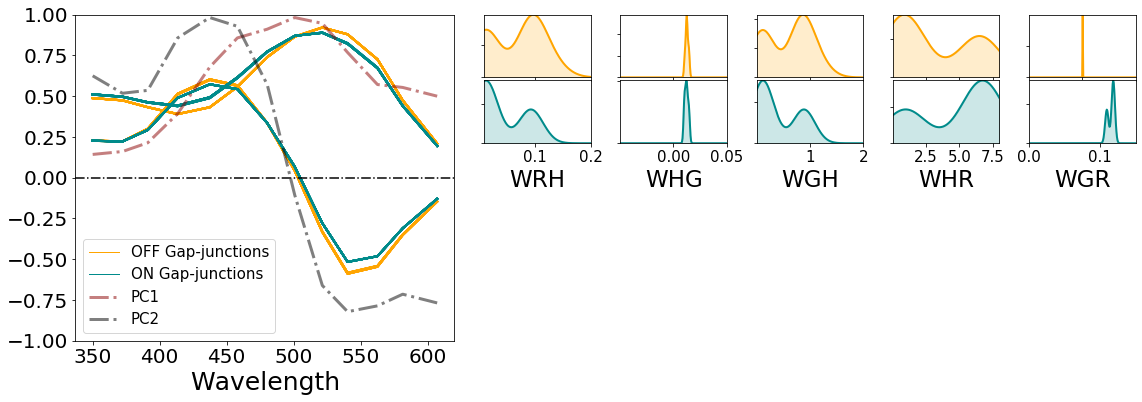

In [268]:
fig=plt.figure(figsize=(19,6))
grid=plt.GridSpec(5,8,wspace=0.28, hspace=0.05)

p1=fig.add_subplot(grid[:,:3])
p2=fig.add_subplot(grid[0,3])
p3=fig.add_subplot(grid[0,4])
p4=fig.add_subplot(grid[0,5])
p5=fig.add_subplot(grid[0,6])
p6=fig.add_subplot(grid[1,3])
p7=fig.add_subplot(grid[1,4])
p8=fig.add_subplot(grid[1,5])
p9=fig.add_subplot(grid[1,6])
p10=fig.add_subplot(grid[0,7])
p11=fig.add_subplot(grid[1,7])

# p12=fig.add_subplot(grid[2:4,4:6])
# p13=fig.add_subplot(grid[2:4,6:8])

###### P1 #######

x_array=Ig0_[0,:]
gap_junction=0
x=0
y1=0
y2=0
params0=np.zeros((20,5))

for ite in range(0,20):
    if combination==0:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+".txt")
    else:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+"_combination_"+str(combination)+".txt")
    params0[ite,:]=params
    HR_fin2=hr(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    HG_fin2=hg(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    
    x=np.append(x,Ir0_[0,:])
    y1=np.append(y1,HR_fin2)
    y2=np.append(y2,HG_fin2)
    p1.plot(x_array,HR_fin2,color="orange",linestyle='-',linewidth=2)
    p1.plot(x_array,HG_fin2,color="orange",linestyle='-',linewidth=2)    
p1.plot(x_array,HR_fin2,color="orange",linestyle='-',linewidth=1,label='OFF Gap-junctions')



###### P2 #######

kernel=scipy.stats.gaussian_kde(params0[:,0])
z=np.linspace(0.01,0.2,200)
dens=kernel(z)
dens/=np.sum(dens)
p2.plot(z,dens,color='orange',linewidth=2)
p2.fill_between(z,dens,color='orange',alpha=0.2)
p2.margins(x=0,y=0)
p2.set_yticklabels([])
p2.set_xticklabels([])

kernel=scipy.stats.gaussian_kde(params0[:,1] + (0.005*np.random.random(20)) )
z=np.linspace(-0.049,0.05,200)
dens=kernel(z)
dens/=np.sum(dens)
p3.plot(z,dens,color='orange',linewidth=2)
p3.fill_between(z,dens,color='orange',alpha=0.2)
p3.margins(x=0,y=0)
p3.set_yticklabels([])
p3.set_xticklabels([])

kernel=scipy.stats.gaussian_kde(params0[:,2])
z=np.linspace(0.01,2,200)
dens=kernel(z)
dens/=np.sum(dens)
p4.plot(z,dens,color='orange',linewidth=2)
p4.fill_between(z,dens,color='orange',alpha=0.2)
p4.margins(x=0,y=0)
p4.set_yticklabels([])
p4.set_xticklabels([])

kernel=scipy.stats.gaussian_kde(params0[:,3])
z=np.linspace(.010,8,200)
dens=kernel(z)
dens/=np.sum(dens)
p5.plot(z,dens,color='orange',linewidth=2)
p5.fill_between(z,dens,color='orange',alpha=0.2)
p5.margins(x=0,y=0)
p5.set_yticklabels([])
p5.set_xticklabels([])

kernel=scipy.stats.gaussian_kde(params0[:,4]+(0.001*np.random.random(20)))
z=np.linspace(-0.1,0.1,200)
dens=kernel(z)
dens/=np.sum(dens)
p10.plot(z,dens,color='orange',linewidth=2)
p10.fill_between(z,dens,color='orange',alpha=0.2)
p10.margins(x=0,y=0)
p10.set_yticklabels([])
p10.set_xticklabels([])


########## P2 ##########

gap_junction=1

x=0
y1=0
y2=0
params0=np.zeros((20,5))

for ite in range(0,20):
    if combination==0:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+".txt")
    else:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+"_combination_"+str(combination)+".txt")
    params0[ite,:]=params
    HR_fin2=hr(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    HG_fin2=hg(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    
    x=np.append(x,Ir0_[0,:])
    y1=np.append(y1,HR_fin2)
    y2=np.append(y2,HG_fin2)
    p1.plot(x_array,HR_fin2,color="darkcyan",linestyle='-',linewidth=2)
    p1.plot(x_array,HG_fin2,color="darkcyan",linestyle='-',linewidth=2)
p1.plot(x_array,HR_fin2,color="darkcyan",linestyle='-',linewidth=1,label='ON Gap-junctions')


# plt.show()
p1.plot(x_array,HR_true,color="darkred",linewidth=3,linestyle='-.',alpha=0.5,label='PC1')
p1.plot(x_array,HG_true,color='k',linewidth=3,linestyle='-.',alpha=0.5,label='PC2')
p1.axhline(y=0,linestyle='-.',color='k')
p1.set_ylim(-1,1)



###### P3 #######

kernel=scipy.stats.gaussian_kde(params0[:,0])
z=np.linspace(0.01,0.2,200)
dens=kernel(z)
dens/=np.sum(dens)
p6.plot(z,dens,color='darkcyan',linewidth=2)
p6.fill_between(z,dens,color='darkcyan',alpha=0.2)
p6.set_yticklabels([])
p6.margins(x=0,y=0)

kernel=scipy.stats.gaussian_kde(params0[:,1] + (0.005*np.random.random(20)) )
z=np.linspace(-0.049,0.05,200)
dens=kernel(z)
dens/=np.sum(dens)
p7.plot(z,dens,color='darkcyan',linewidth=2)
p7.fill_between(z,dens,color='darkcyan',alpha=0.2)
p7.set_yticklabels([])
p7.margins(x=0,y=0)

kernel=scipy.stats.gaussian_kde(params0[:,2])
z=np.linspace(0.01,2,200)
dens=kernel(z)
dens/=np.sum(dens)
p8.plot(z,dens,color='darkcyan',linewidth=2)
p8.fill_between(z,dens,color='darkcyan',alpha=0.2)
p8.set_yticklabels([])
p8.margins(x=0,y=0)

kernel=scipy.stats.gaussian_kde(params0[:,3])
z=np.linspace(0.01,8,200)
dens=kernel(z)
dens/=np.sum(dens)
p9.plot(z,dens,color='darkcyan',linewidth=2)
p9.fill_between(z,dens,color='darkcyan',alpha=0.2)
p9.set_yticklabels([])
p9.margins(x=0,y=0)

kernel=scipy.stats.gaussian_kde(params0[:,4]+(0.0005*np.random.random(20)))
z=np.linspace(0.0,0.15,200)
dens=kernel(z)
dens/=np.sum(dens)
p11.plot(z,dens,color='darkcyan',linewidth=2)
p11.fill_between(z,dens,color='darkcyan',alpha=0.2)
p11.margins(x=0,y=0)
p11.set_yticklabels([])

#WRH0, WHG0, WGH0, WHR0, Lambda0


p1.tick_params(labelsize=20)
p6.tick_params(labelsize=15)
p7.tick_params(labelsize=15)
p8.tick_params(labelsize=15)
p9.tick_params(labelsize=15)
p11.tick_params(labelsize=15)
p1.set_xlabel("Wavelength", fontsize='25')
p6.set_xlabel("WRH", fontsize='23')
p7.set_xlabel("WHG", fontsize='23')
p8.set_xlabel("WGH", fontsize='23')
p9.set_xlabel("WHR", fontsize='23')
p11.set_xlabel("WGR", fontsize='23')
p1.legend(fontsize='15')

# plt.savefig("Plots/DescGrad_1.pdf",bbox_inches = 'tight', pad_inches = 0)
# plt.savefig("../Notes/Figures/DescGrad.pdf",bbox_inches = 'tight', pad_inches = 0)

## Figure 2 - inset

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

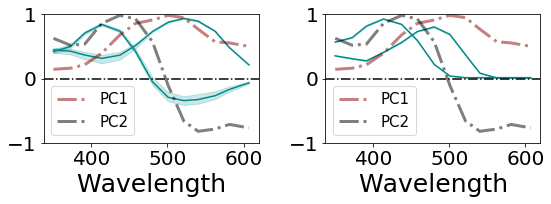

In [265]:
import seaborn as sns

fig=plt.figure(figsize=(19,6))
grid=plt.GridSpec(5,8,wspace=0.9, hspace=0.05)

p1=fig.add_subplot(grid[3:5,3:5])

combination=1
Ir0_, Ig0_ = Sens_curves(combination)
Ig0 = Ig0_[1,:]
Ir0 = Ir0_[1,:]

gap_junction=0

x=0
y1=0
y2=0
params0=np.zeros((20,5))

for ite in np.arange(0,20):
    if combination==0:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+".txt")
    else:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+"_combination_"+str(combination)+".txt")
    params0[ite,:]=params
    HR_fin2=hr(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    HG_fin2=hg(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    
    x=np.append(x,Ir0_[0,:])
    y1=np.append(y1,HR_fin2)
    y2=np.append(y2,HG_fin2)
#     plt.plot(Ir0_[0,:],HR_fin2,color="red",linestyle='-.',linewidth=0.5)
#     plt.plot(Ir0_[0,:],HG_fin2,color="blue",linestyle='-.',linewidth=0.5)
    
sns.lineplot(x[1:],y1[1:],color='darkcyan')
sns.lineplot(x[1:],y2[1:],color='darkcyan')    
    
    
    
    
combination=2
Ir0_, Ig0_ = Sens_curves(combination)
Ig0 = Ig0_[1,:]
Ir0 = Ir0_[1,:]

gap_junction=0

x=0
y1=0
y2=0
params0=np.zeros((20,5))

for ite in np.arange(0,20):
    if combination==0:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+".txt")
    else:
        params=np.loadtxt("Data/GradDesc/Parameters_ite_"+str(ite)+"_GapJunc_"+str(gap_junction)+"_combination_"+str(combination)+".txt")
    params0[ite,:]=params
    HR_fin2=hr(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    HG_fin2=hg(Ig0, Ir0, params[0], params[1], params[2], params[3], params[4])
    
    x=np.append(x,Ir0_[0,:])
    y1=np.append(y1,HR_fin2)
    y2=np.append(y2,HG_fin2)  
    
p2=fig.add_subplot(grid[3:5,5:7])

sns.lineplot(x[1:],y1[1:],color='darkcyan')
sns.lineplot(x[1:],y2[1:],color='darkcyan')    
 
    
# HR_fin2=hr(Ig0, Ir0, 0.01613111, 0.01,       0.09463295, 5.23888483, 0.00788696 )
# HG_fin2=hg(Ig0, Ir0, 0.01613111, 0.01,       0.09463295, 5.23888483, 0.00788696 )
# plt.plot(HR_fin2,color="red",linestyle='-.',linewidth=0.5)
# plt.plot(HG_fin2,color="blue",linestyle='-.',linewidth=0.5)

# plt.show()
p1.plot(Ir0_[0,:],HR_true,color="darkred",linewidth=3,linestyle='-.',alpha=0.5,label='PC1')
p1.plot(Ir0_[0,:],HG_true,color="k",linewidth=3,linestyle='-.',alpha=0.5,label='PC2')
p2.plot(Ir0_[0,:],HR_true,color="darkred",linewidth=3,linestyle='-.',alpha=0.5,label='PC1')
p2.plot(Ir0_[0,:],HG_true,color="k",linewidth=3,linestyle='-.',alpha=0.5,label='PC2')
p1.axhline(y=0,linestyle='-.',color='k')
p2.axhline(y=0,linestyle='-.',color='k')
p1.set_ylim(-1,1)
p2.set_ylim(-1,1)


p1.tick_params(labelsize=20)
p2.tick_params(labelsize=20)
p1.set_xlabel("Wavelength", fontsize='25')
p2.set_xlabel("Wavelength", fontsize='25')
p1.legend(fontsize='15')
p2.legend(fontsize='15')

plt.savefig("Plots/DescGrad_2.pdf",bbox_inches = 'tight', pad_inches = 0)

## Plot - Gain Function

Text(0, 0.5, '$\\tanh(x)$')

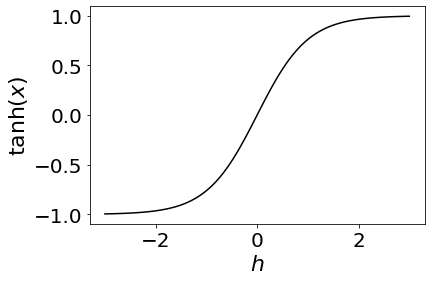

In [280]:
x=np.linspace(-3,3,100)
plt.plot(x,np.tanh(x),color='k')
plt.tick_params(labelsize='20')
plt.xlabel("$h$",fontsize='22')
plt.ylabel(r"$\tanh(x)$",fontsize='22')


### Figure 3
#### Trichromatic system -- function responses

In [4]:
def PCA():
    ############ Points of the pca #############
    lmin_=350
    lmax_=650

    Ponto0=np.array([132,-287])
    xmax=281
    ymax=-343
    pc1_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])
    pc1_y= - np.array([295., 296, 299, 309, 325, 335, 338, 342, 340, 330, 319, 318, 315 ])

    pc2_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])
    pc2_y= - np.array([322., 316, 317, 335, 342, 339, 319, 281, 250, 241, 243, 247, 244 ])
    
    pc3_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])     # PC3
    pc3_y= - np.array([343, 327, 313, 303, 285, 274, 269, 272, 275, 287, 304, 309, 313 ])
    
#     pc3_x=np.array([132., 144, 155, 169, 182, 195, 207, 219, 232, 243, 256, 268, 281 ])   # PC2 SHIFTED
#     pc3_y= - np.array([317., 335, 342, 339, 319, 281, 250, 241, 243, 247, 244, 244, 244 ])
    
    pc1=np.array((pc1_x, pc1_y))
    pc2=np.array((pc2_x, pc2_y))
    pc3=np.array((pc3_x, pc3_y))
    
    pc1[0,:]=pc1[0,:]-Ponto0[0]
    pc1[1,:]=-pc1[1,:]+Ponto0[1]
    pc2[0,:]=pc2[0,:]-Ponto0[0]
    pc2[1,:]=-pc2[1,:]+Ponto0[1]
    pc3[0,:]=pc3[0,:]-Ponto0[0]
    pc3[1,:]=-pc3[1,:]+Ponto0[1]
    
    pc1[1,:]=((pc1[1,:])/(-ymax+Ponto0[1]))
    pc1[0,:]=((pc1[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    pc2[1,:]=((pc2[1,:])/(-ymax+Ponto0[1]))
    pc2[0,:]=((pc2[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    pc3[1,:]=((pc3[1,:])/(-ymax+Ponto0[1]))
    pc3[0,:]=((pc3[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    
#     plt.plot(pc1[0,:],pc1[1,:],color='r')
#     plt.plot(pc2[0,:],pc2[1,:],color='g')
#     plt.plot(pc3[0,:],pc3[1,:],color='b')
    
    return pc1, pc2, pc3




In [5]:
def Sens_curves_tri(N_cones,combination): # case: 0 Dichromatic, 1 Mono-UV, 2 Mono-Green.
    
    ############ Points of the sensitivity curves #############
    lmin_=350
    lmax_=650
    
    Ponto0=np.array([131,272])
    xmax=306
    ymax=206

    Red_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Red_y=np.array([237., 238, 241, 244, 241, 232, 219, 210, 206, 209, 220, 238, 257 ])
    
    Green_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Green_y=np.array([232., 233, 230, 218, 210, 206, 212, 225, 247, 266, 271, 271, 271 ])
    
    Blue_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Blue_y=np.array([231., 226, 213, 205, 211, 229, 256, 269, 271, 271, 271, 271, 271 ])

    Red=np.array((Red_x, Red_y))
    Green=np.array([Green_x, Green_y])
    Blue=np.array([Blue_x,Blue_y])
    
    Red[0,:]=Red[0,:]-Ponto0[0]
    Red[1,:]=-Red[1,:]+Ponto0[1]
    Green[0,:]=Green[0,:]-Ponto0[0]
    Green[1,:]=-Green[1,:]+Ponto0[1]
    Blue[0,:]=Blue[0,:]-Ponto0[0]
    Blue[1,:]=-Blue[1,:]+Ponto0[1]
    
    Red[1,:]=((Red[1,:])/(-ymax+Ponto0[1]))
    Red[0,:]=((Red[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    Green[1,:]=((Green[1,:])/(-ymax+Ponto0[1]))
    Green[0,:]=((Green[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    Blue[1,:]=((Blue[1,:])/(-ymax+Ponto0[1]))
    Blue[0,:]=((Blue[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    
    if N_cones==2:
        if combination==0:
            return Red[0,:], np.array((Red[1,:], Green[1,:]))
        if combination==1:
            return Red[0,:], np.array((Red[1,:], Blue[1,:]))
        if combination==2:
            return Red[0,:], np.array((Green[1,:], Blue[1,:]))
    if N_cones==3:
        return Red[0,:], np.array((Red[1,:], Green[1,:], Blue[1,:]))
    

In [6]:
def gain_function_inh(h):
    return np.tanh(h)

def gain_function_ex(h):
    return np.tanh(h)

In [7]:
def Solve_Euler(W_ih, W_hi, W_ij, N_cones, I_ext):
    
    H_cones = np.zeros((N_l0,N_cones))
    H_HC = np.zeros(N_l0)

    for counter_st in range(N_l0):

        Solution_cones=np.zeros((N_cones,N_t))
        Solution_HC=np.zeros((N_t))
        Solution_cones[:,0]=np.random.random(N_cones)-0.5
        Solution_HC[0]=np.random.random()

        for counter_t in range(1,N_t):
            for counter_cones in range(N_cones):
                Solution_cones[counter_cones,counter_t] = Solution_cones[counter_cones,counter_t-1] + ( - Solution_cones[counter_cones,counter_t-1] + I_ext[counter_cones,counter_st] - W_ih[counter_cones]*gain_function_inh(Solution_HC[counter_t-1]) + np.sum( W_ij[counter_cones,:]*gain_function_ex(Solution_cones[:,counter_t-1])) )*(dt/Tau_E)
            Solution_HC[counter_t] = Solution_HC[counter_t-1] + ( - Solution_HC[counter_t-1] + np.sum(W_hi*gain_function_ex(Solution_cones[:,counter_t-1]) ) )*(dt/Tau_I)

        H_cones[counter_st,:]=Solution_cones[:,-2]
        H_HC[counter_st]=Solution_HC[-2]
    
    return H_cones, H_HC 

In [8]:
# ******************  PARAMETERS ****************** # 

###### Main Equation ########

Tau_E=10      #Photoreceptors time reaction
Tau_I=0.1    #Horizontal cells time reaction
Resistance=1

###### Number of cones ########

N_cones=3
combination=0 # Dichromatic system --> If 0: Red-Green,  if 1: Red-blue, if 2: Greeen-blue

########## Coupling parameters  ##########

parameters=np.loadtxt("Data/GradDesc/Trichromatic_Parameters_lambda!=0.txt")

###### Sensitivity curves ########

N_l0=13 #(N_points)

######  Integration equation ########

tmax=200
tmin=0
N_t=1000
dt=(tmax-tmin)/N_t

#### External stimulus ########

l_array,Sens_curves=Sens_curves_tri(N_cones,combination)
I_ext=Sens_curves*Resistance


In [9]:
from scipy import stats

N_ite=20
H_cones = np.zeros((N_ite,N_l0,N_cones))
H_HC = np.zeros((N_ite,N_l0))


for ite in range(N_ite):
    W_rh = parameters[ite,0]     #Connection weights from HCs to Cones
    W_gh = parameters[ite,2]
    W_bh = parameters[ite,4]
    W_hr = parameters[ite,1]     #Connection weights from Cones to HCs
    W_hg = parameters[ite,3]
    W_hb = parameters[ite,5]
    W_rg = parameters[ite,6]
    W_rb = parameters[ite,7]
    W_gb = parameters[ite,8]

    if N_cones==2:
        if combination==0:
            W_ih=np.array([W_rh,W_gh])
            W_hi=np.array([W_hr,W_hg])
            W_ij=np.array(([0,W_rg],[W_rg, 0]))

        if combination==1:
            W_ih=np.array([W_rh,W_bh])
            W_hi=np.array([W_hr,W_hb])
            W_ij=np.array(([0,W_rb],[W_rb, 0]))

        if combination==2:
            W_ih=np.array([W_gh,W_bh])
            W_hi=np.array([W_hg,W_hb])
            W_ij=np.array(([0, W_gb],[W_gb, 0]))
    if N_cones==3:
        W_ih=np.array([W_rh,W_gh,W_bh])
        W_hi=np.array([W_hr,W_hg,W_hb])
        W_ij=np.array(([0,W_rg,W_rb],[W_rg, 0, W_gb],[W_rb, W_gb, 0]))
    
    H_cones[ite,:,:],H_HC[ite,:]=Solve_Euler(W_ih, W_hi, W_ij, N_cones, I_ext)

######### Second plot

N_ite=20
H_cones_2 = np.zeros((N_ite,N_l0,N_cones))
H_HC_2 = np.zeros((N_ite,N_l0))
    
W_rh = 0.1     #Connection weights from HCs to Cones
W_gh = 0.2
W_bh = 0.1
W_hr = 0.2     #Connection weights from Cones to HCs
W_hg = 0.3
W_hb = 0.2
W_rg = 1.6
W_rb = 1.5
W_gb = 1.6

if N_cones==2:
    if combination==0:
        W_ih=np.array([W_rh,W_gh])
        W_hi=np.array([W_hr,W_hg])
        W_ij=np.array(([0,W_rg],[W_rg, 0]))

    if combination==1:
        W_ih=np.array([W_rh,W_bh])
        W_hi=np.array([W_hr,W_hb])
        W_ij=np.array(([0,W_rb],[W_rb, 0]))

    if combination==2:
        W_ih=np.array([W_gh,W_bh])
        W_hi=np.array([W_hg,W_hb])
        W_ij=np.array(([0, W_gb],[W_gb, 0]))
if N_cones==3:
    W_ih=np.array([W_rh,W_gh,W_bh])
    W_hi=np.array([W_hr,W_hg,W_hb])
    W_ij=np.array(([0,W_rg,W_rb],[W_rg, 0, W_gb],[W_rb, W_gb, 0]))
    
for ite in range(N_ite):
    H_cones_2[ite,:,:],H_HC_2[ite,:]=Solve_Euler(W_ih, W_hi, W_ij, N_cones, I_ext)
    

#### distribution parameters ######

N_points=100

dis=np.zeros((9,N_points))
arr=np.zeros((9,N_points))

for npar in range(9):
    vec=parameters[:,npar] 
    
    a=np.unique(vec)
    if a.size>1:    
        kernel=stats.gaussian_kde(vec)
        array=np.linspace(np.min(vec),np.max(vec),N_points)
        dis[npar,:]=kernel(array)
        arr[npar,:]=array
    else:
        vec=parameters[:,npar]+0.001*np.random.random(vec.size)
        kernel=stats.gaussian_kde(vec)
        array=np.linspace(0, 0.05, N_points)
        dis[npar,:]=kernel(array)
        arr[npar,:]=array
#     if npar==3:
#         vec=parameters[:,npar]+0.001*np.random.random(vec.size)
#         kernel=stats.gaussian_kde(vec)
#         array=np.linspace(0, 0.05, N_points)
#         dis[npar,:]=kernel(array)
#         arr[npar,:]=array


/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 0, '$W_{gb}$')

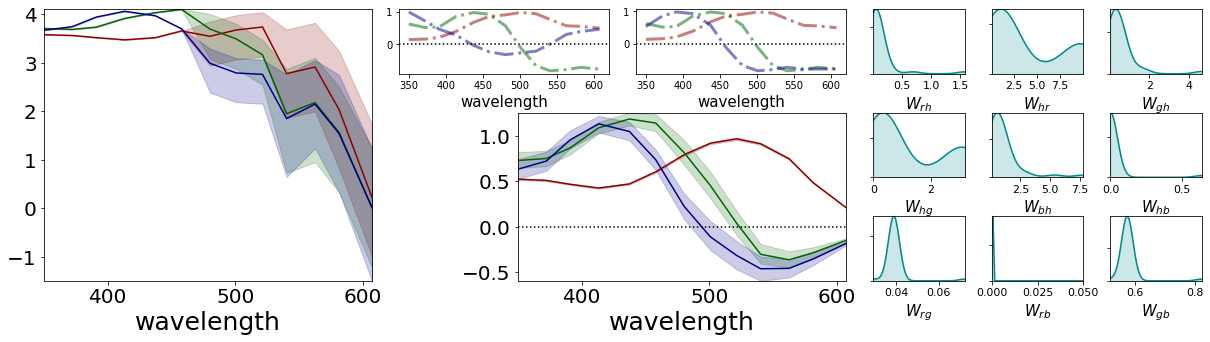

In [12]:
fig=plt.figure(figsize=(25,5))
grid=plt.GridSpec(3,12, wspace=0.3, hspace=0.6)

p1=fig.add_subplot(grid[:,0:3])
N_ite=20
y_R2, y_G2, y_B2, x_2 = np.zeros(4)

for ite in range(N_ite):
    y_R2=np.append(y_R2, H_cones_2[ite,:,0])
    y_G2=np.append(y_G2, H_cones_2[ite,:,1])
    y_B2=np.append(y_B2, H_cones_2[ite,:,2])
    x_2=np.append(x_2, l_array)

sns.lineplot(x_2[1:],y_R2[1:],color='darkred')
sns.lineplot(x_2[1:],y_G2[1:],color='darkgreen')    
sns.lineplot(x_2[1:],y_B2[1:],color='darkblue')
# plt.plot(x_2[1:],y_R2[1:],color='darkred',marker='o',linestyle='none')
# plt.plot(x_2[1:],y_G2[1:],color='darkgreen',marker='o',linestyle='none')
# plt.plot(x_2[1:],y_B2[1:],color='darkblue',marker='o',linestyle='none')

p1.tick_params(labelsize='20')
p1.set_xlabel("wavelength",fontsize='25')


p2=fig.add_subplot(grid[1:,4:7])
N_ite=20
y_R, y_G, y_B, x_ = np.zeros(4)

for ite in range(N_ite):
    y_R=np.append(y_R, H_cones[ite,:,0])
    y_G=np.append(y_G, H_cones[ite,:,1])
    y_B=np.append(y_B, H_cones[ite,:,2])
    x_=np.append(x_, l_array)

sns.lineplot(x_[1:],y_R[1:],color='darkred')
sns.lineplot(x_[1:],y_G[1:],color='darkgreen')    
sns.lineplot(x_[1:],y_B[1:],color='darkblue')

pc1,pc2,pc3=PCA()
# p2.plot(l_array,pc1[1,:],color="darkred",linewidth=3,linestyle='-.',alpha=0.5,label='PC1')
# p2.plot(l_array,pc2[1,:],color="darkgreen",linewidth=3,linestyle='-.',alpha=0.5,label='PC2')
# p2.plot(l_array,pc3[1,:],color="darkblue",linewidth=3,linestyle='-.',alpha=0.5,label='PC3')
p2.axhline(y=0,color='k',linestyle=':')
p2.tick_params(labelsize='20')
p2.set_xlabel("wavelength",fontsize='25')


p21=fig.add_subplot(grid[0,3:5])
p22=fig.add_subplot(grid[0,5:7])
pc1,pc2,pc3=PCA_()
p21.plot(l_array,pc1[1,:],color="darkred",linewidth=3,linestyle='-.',alpha=0.5,label='PC1')
p21.plot(l_array,pc2[1,:],color="darkgreen",linewidth=3,linestyle='-.',alpha=0.5,label='PC2')
p21.plot(l_array,pc3[1,:],color="darkblue",linewidth=3,linestyle='-.',alpha=0.5,label='PC3')
pc1,pc2,pc3=PCA()
p22.plot(l_array,pc1[1,:],color="darkred",linewidth=3,linestyle='-.',alpha=0.5,label='PC1')
p22.plot(l_array,pc2[1,:],color="darkgreen",linewidth=3,linestyle='-.',alpha=0.5,label='PC2')
p22.plot(l_array,pc3[1,:],color="darkblue",linewidth=3,linestyle='-.',alpha=0.5,label='PC3')
p21.axhline(y=0,color='k',linestyle=':')
p21.tick_params(labelsize='10')
p21.set_xlabel("wavelength",fontsize='15')
p22.axhline(y=0,color='k',linestyle=':')
p22.tick_params(labelsize='10')
p22.set_xlabel("wavelength",fontsize='15')

p3=fig.add_subplot(grid[0,7])
p3.plot(arr[0,:],dis[0,:],color='darkcyan')
p3.fill_between(arr[0,:],dis[0,:],alpha=0.2,color='darkcyan')
p4=fig.add_subplot(grid[0,8])
p4.plot(arr[1,:],dis[1,:],color='darkcyan')
p4.fill_between(arr[1,:],dis[1,:],alpha=0.2,color='darkcyan')
p5=fig.add_subplot(grid[0,9])
p5.plot(arr[2,:],dis[2,:],color='darkcyan')
p5.fill_between(arr[2,:],dis[2,:],alpha=0.2,color='darkcyan')
p6=fig.add_subplot(grid[1,7])
p6.plot(arr[3,:],dis[3,:],color='darkcyan')
p6.fill_between(arr[3,:],dis[3,:],alpha=0.2,color='darkcyan')
p7=fig.add_subplot(grid[1,8])
p7.plot(arr[4,:],dis[4,:],color='darkcyan')
p7.fill_between(arr[4,:],dis[4,:],alpha=0.2,color='darkcyan')
p8=fig.add_subplot(grid[1,9])
p8.plot(arr[5,:],dis[5,:],color='darkcyan')
p8.fill_between(arr[5,:],dis[5,:],alpha=0.2,color='darkcyan')

p9=fig.add_subplot(grid[2,7])
p9.plot(arr[6,:],dis[6,:],color='darkcyan')
p9.fill_between(arr[6,:],dis[6,:],alpha=0.2,color='darkcyan')
p10=fig.add_subplot(grid[2,8])
p10.plot(arr[7,:],dis[7,:],color='darkcyan')
p10.fill_between(arr[7,:],dis[7,:],alpha=0.2,color='darkcyan')
p11=fig.add_subplot(grid[2,9])
p11.plot(arr[8,:],dis[8,:],color='darkcyan')
p11.fill_between(arr[8,:],dis[8,:],alpha=0.2,color='darkcyan')



p1.margins(x=0,y=0)
p2.margins(x=0,y=0)
p3.margins(x=0,y=0)
p4.margins(x=0,y=0)
p5.margins(x=0,y=0)
p6.margins(x=0,y=0)
p7.margins(x=0,y=0)
p8.margins(x=0,y=0)
p9.margins(x=0,y=0)
p10.margins(x=0,y=0)
p11.margins(x=0,y=0)

p3.set_yticklabels([])
p4.set_yticklabels([])
p5.set_yticklabels([])
p6.set_yticklabels([])
p7.set_yticklabels([])
p8.set_yticklabels([])
p9.set_yticklabels([])
p10.set_yticklabels([])
p11.set_yticklabels([])

p3.tick_params(labelsize=11)
p4.tick_params(labelsize=11)
p5.tick_params(labelsize=11)
p6.tick_params(labelsize=11)
p7.tick_params(labelsize=11)
p8.tick_params(labelsize=11)
p9.tick_params(labelsize=11)
p10.tick_params(labelsize=11)
p11.tick_params(labelsize=11)

p3.set_xlabel(r"$W_{rh}$",fontsize='15')
p4.set_xlabel(r"$W_{hr}$",fontsize='15')
p5.set_xlabel(r"$W_{gh}$",fontsize='15')
p6.set_xlabel(r"$W_{hg}$",fontsize='15')
p7.set_xlabel(r"$W_{bh}$",fontsize='15')
p8.set_xlabel(r"$W_{hb}$",fontsize='15')
p9.set_xlabel(r"$W_{rg}$",fontsize='15')
p10.set_xlabel(r"$W_{rb}$",fontsize='15')
p11.set_xlabel(r"$W_{gb}$",fontsize='15') 

# plt.savefig("Plots/Trichromatic_all.pdf")

In [107]:
### Load Data

#--------------------------------------
from mpl_toolkits import mplot3d
x = np.arange(0.1, 2., 0.1)
y = np.arange(0.1, 2., 0.1)
z = np.arange(0.1, 2., 0.1)
N = x.size

X, Y = np.meshgrid(x, y)
Matrix = np.zeros((N,N,N))
for j in range(N):
    idx_params = np.array(np.loadtxt("Data/idx_params_trichro_matrix_WRG_"+str(np.round(z[j], decimals=1))+".txt"),dtype=int)
    for i in range(idx_params.shape[0]):
        Matrix[j, idx_params[i,0], idx_params[i,1]] = 1

Matrix_sum = np.sum(np.flip(Matrix, axis=1), axis=0)       


#--------------------------------------
string = ['FuncionalOpsins', 'PCA', 'mixed']
Colors = ['purple', 'olive', 'deeppink', 'dodgerblue', 'orangered']

Param_string = 1
par_connections = 0
L_array = np.loadtxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hr_learned= np.loadtxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hg_learned= np.loadtxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hb_learned= np.loadtxt("Data/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
L = np.loadtxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h1_true = np.loadtxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h2_true = np.loadtxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h3_true = np.loadtxt("Data/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
Params = np.loadtxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")

par_connections = 1
L_array_ = np.loadtxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hr_learned_ = np.loadtxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hg_learned_ = np.loadtxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
hb_learned_ = np.loadtxt("Data/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
L_ = np.loadtxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h1_true_ = np.loadtxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h2_true_ = np.loadtxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
h3_true_ = np.loadtxt("Data/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")
Params_ = np.loadtxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic.txt")


#------------------------------
Param_string = 1

par_connections = 0
L_array_2hc = np.loadtxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hr_learned_2hc= np.loadtxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hg_learned_2hc= np.loadtxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hb_learned_2hc= np.loadtxt("Data/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
L_2hc = np.loadtxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h1_true_2hc = np.loadtxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h2_true_2hc = np.loadtxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h3_true_2hc = np.loadtxt("Data/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
Params_2hc = np.loadtxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")

par_connections = 1
L_array_2hc_ = np.loadtxt("Data/Learned_L_array_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hr_learned_2hc_ = np.loadtxt("Data/Learned_hr_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hg_learned_2hc_ = np.loadtxt("Data/Learned_hg_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
hb_learned_2hc_ = np.loadtxt("Data/Learned_hb_learned_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
L_2hc_ = np.loadtxt("Data/Learned_L_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h1_true_2hc_ = np.loadtxt("Data/Learned_h1_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h2_true_2hc_ = np.loadtxt("Data/Learned_h2_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
h3_true_2hc_ = np.loadtxt("Data/Learned_h3_true_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")
Params_2hc_ = np.loadtxt("Data/Learned_Params_ParConnections_"+str(par_connections)+"_"+str(string[Param_string])+"_trichromatic_2hc.txt")

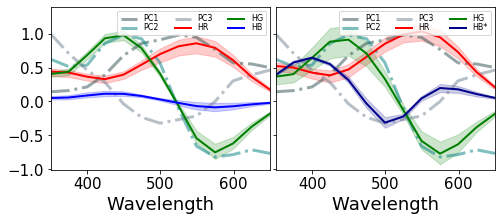

In [144]:
Colors_pca = ['darkslategray', 'teal', 'slategray']

fig = plt.figure(figsize=(12,3))
grid = plt.GridSpec(2, 6, wspace = 0.05 , hspace = 0.1)

# fig = plt.figure(figsize=(10,5))
# grid = plt.GridSpec(2, 4, hspace = 0.05)

# p1 = fig.add_subplot(grid[:, :2])
p2 = fig.add_subplot(grid[:, :2])
p3 = fig.add_subplot(grid[:, 2:4])

# #--------------------------------------
# p11 = p1.imshow(Matrix_sum, extent = [0.1, 1.9, 0.1, 1.9], aspect = 'auto', interpolation = 'nearest', cmap='GnBu', alpha=0.5)
# p1.tick_params(labelsize = '17')
# p1.set_xlabel(r"$W_{gb}$", fontsize = 18)
# p1.set_ylabel(r"$W_{rb}$", fontsize = 18)
# plt.colorbar(p11, ax=p1)

#--------------------------------------
p2.plot(L, h1_true,color=Colors_pca[0], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC1')
p2.plot(L, h2_true,color=Colors_pca[1], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC2')
p2.plot(L, h3_true,color=Colors_pca[2], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC3')
sns.lineplot(x = L_array_[1:], y = hr_learned_[1:], color='r', ax=p2, linewidth = 2, label='HR')
sns.lineplot(x = L_array_[1:], y = hg_learned_[1:], color='g', ax=p2, linewidth = 2, label='HG')
sns.lineplot(x = L_array_[1:], y = hb_learned_[1:], color='b', ax=p2, linewidth = 2, label='HB')
p2.set_xlim(350.1, 650)
p2.set_ylim(-1.01, 1.4)
p2.tick_params(labelsize=15)
p2.set_xlabel("Wavelength", fontsize='18')
p2.legend(fontsize='8',loc=1, ncol = 3, handleheight=0.2, labelspacing=0.006)

#--------------------------------------
p3.plot(L_2hc, h1_true_2hc,color=Colors_pca[0], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC1')
p3.plot(L_2hc, h2_true_2hc,color=Colors_pca[1], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC2')
p3.plot(L_2hc, h3_true_2hc,color=Colors_pca[2], linestyle='-.', linewidth = 3, alpha = 0.5, label='PC3')
sns.lineplot(x = L_array_2hc_[1:], y = 1.2*hr_learned_2hc_[1:], color='r', ax=p3, linewidth = 2, label='HR')
sns.lineplot(x = L_array_2hc_[1:], y = 1.2*hg_learned_2hc_[1:], color='g', ax=p3, linewidth = 2, label='HG')
sns.lineplot(x = L_array_2hc_[1:], y = 1.4*hb_learned_2hc_[1:], color='darkblue', ax=p3, linewidth = 2, label='HB*')
# sns.lineplot(x = L_array_2hc[1:], y = hr_learned_2hc[1:], color='darkcyan')
# sns.lineplot(x = L_array_2hc[1:], y = hg_learned_2hc[1:], color='darkcyan')
# sns.lineplot(x = L_array_2hc[1:], y = hb_learned_2hc[1:], color='darkcyan')

p3.set_yticklabels([])
p3.set_xlim(350.1, 650)
p3.set_ylim(-1.01, 1.4)
p3.tick_params(labelsize=15)
p3.set_xlabel("Wavelength", fontsize='18')
p3.legend(fontsize='8',loc=1, ncol = 3, handleheight=0.2, labelspacing=0.007)

plt.savefig("Plots/Trichro_Fit_pca+opsins.pdf")
plt.show()


### Tetrachromatic

In [250]:
def gain_function_inh(h):
    return h
#     return np.tanh(h)

def gain_function_ex(h):
    return h
#     return np.tanh(h)

In [251]:
def Solve_Euler_tetra(W_ih, W_hi, W_ij, W_iu, N_cones, I_ext):
    
    H_cones = np.zeros((N_l0,N_cones))
    H_HC = np.zeros(N_l0)

    for counter_st in range(N_l0):

        Solution_cones=np.zeros((N_cones,N_t))
        Solution_HC=np.zeros((N_t))
        Solution_cones[:,0]=np.random.random(N_cones)-0.5
        Solution_HC[0]=np.random.random()

        for counter_t in range(1,N_t):
            for counter_cones in range(N_cones):
                Solution_cones[counter_cones,counter_t] = Solution_cones[counter_cones,counter_t-1] + ( - Solution_cones[counter_cones,counter_t-1] + I_ext[counter_cones,counter_st] - W_ih[counter_cones]*gain_function_inh(Solution_HC[counter_t-1]) + np.sum( W_ij[counter_cones,:]*gain_function_ex(Solution_cones[:,counter_t-1])) + W_iu[counter_cones]*I_ext[-1,counter_st])*(dt/Tau_E)
            Solution_HC[counter_t] = Solution_HC[counter_t-1] + ( - Solution_HC[counter_t-1] + np.sum(W_hi*gain_function_ex(Solution_cones[:,counter_t-1]) ) )*(dt/Tau_I)

        H_cones[counter_st,:]=Solution_cones[:,-2]
        H_HC[counter_st]=Solution_HC[-2]
    
    return H_cones, H_HC 

In [252]:
def Solve_Euler(W_ih, W_hi, W_ij, N_cones, I_ext):
    
    H_cones = np.zeros((N_l0,N_cones))
    H_HC = np.zeros(N_l0)

    for counter_st in range(N_l0):

        Solution_cones=np.zeros((N_cones,N_t))
        Solution_HC=np.zeros((N_t))
        Solution_cones[:,0]=np.random.random(N_cones)-0.5
        Solution_HC[0]=np.random.random()

        for counter_t in range(1,N_t):
            for counter_cones in range(N_cones):
                Solution_cones[counter_cones,counter_t] = Solution_cones[counter_cones,counter_t-1] + ( - Solution_cones[counter_cones,counter_t-1] + I_ext[counter_cones,counter_st] - W_ih[counter_cones]*gain_function_inh(Solution_HC[counter_t-1]) + np.sum( W_ij[counter_cones,:]*gain_function_ex(Solution_cones[:,counter_t-1])) )*(dt/Tau_E)
            Solution_HC[counter_t] = Solution_HC[counter_t-1] + ( - Solution_HC[counter_t-1] + np.sum(W_hi*gain_function_ex(Solution_cones[:,counter_t-1]) ) )*(dt/Tau_I)

        H_cones[counter_st,:]=Solution_cones[:,-2]
        H_HC[counter_st]=Solution_HC[-2]
    
    return H_cones, H_HC 

In [634]:
def Sens_curves_tetra(N_cones,combination): # case: 0 Dichromatic, 1 Mono-UV, 2 Mono-Green.
    
    ############ Points of the sensitivity curves #############
    lmin_=350
    lmax_=650
    
    Ponto0=np.array([131,272])
    xmax=306
    ymax=206

    Red_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Red_y=np.array([237., 238, 241, 244, 241, 232, 219, 210, 206, 209, 220, 238, 257 ])
    
    Green_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Green_y=np.array([232., 233, 230, 218, 210, 206, 212, 225, 247, 266, 271, 271, 271 ])
    
    Blue_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    Blue_y=np.array([231., 226, 213, 205, 211, 229, 256, 269, 271, 271, 271, 271, 271 ])
    
    UV_x=np.array([131., 144, 155, 168, 182, 194, 207, 219, 231, 242, 255, 266, 281 ])
    UV_y=np.array([205., 208, 219, 237, 258, 269, 271, 271, 271, 271, 271, 271, 271 ])

    Red=np.array((Red_x, Red_y))
    Green=np.array([Green_x, Green_y])
    Blue=np.array([Blue_x,Blue_y])
    UV=np.array([UV_x, UV_y])
    
    Red[0,:]=Red[0,:]-Ponto0[0]
    Red[1,:]=-Red[1,:]+Ponto0[1]
    Green[0,:]=Green[0,:]-Ponto0[0]
    Green[1,:]=-Green[1,:]+Ponto0[1]
    Blue[0,:]=Blue[0,:]-Ponto0[0]
    Blue[1,:]=-Blue[1,:]+Ponto0[1]
    UV[0,:]=UV[0,:]-Ponto0[0]
    UV[1,:]=-UV[1,:]+Ponto0[1]
    
    Red[1,:]=((Red[1,:])/(-ymax+Ponto0[1]))
    Red[0,:]=((Red[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    Green[1,:]=((Green[1,:])/(-ymax+Ponto0[1]))
    Green[0,:]=((Green[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    Blue[1,:]=((Blue[1,:])/(-ymax+Ponto0[1]))
    Blue[0,:]=((Blue[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    UV[1,:]=((UV[1,:])/(-ymax+Ponto0[1]))
    UV[0,:]=((UV[0,:]*(lmax_-lmin_))/(xmax-Ponto0[0]))+lmin_
    
    if N_cones==2:
        if combination==0:
            return Red[0,:], np.array((Red[1,:], Green[1,:]))
        if combination==1:
            return Red[0,:], np.array((Red[1,:], Blue[1,:]))
        if combination==2:
            return Red[0,:], np.array((Green[1,:], Blue[1,:]))
    if N_cones==3:
        return Red[0,:], np.array([Red[1,:], Green[1,:], Blue[1,:], UV[1,:]])
    

In [769]:
# ******************  PARAMETERS ****************** # 

###### Main Equation ########

Tau_E=10      #Photoreceptors time reaction
Tau_I=0.1    #Horizontal cells time reaction
Resistance=1

###### Number of cones ########

N_cones=3
combination=0 # Dichromatic system --> If 0: Red-Green,  if 1: Red-blue, if 2: Greeen-blue

########## Coupling parameters  ##########

parameters=np.loadtxt("Data/GradDesc/Tetrachromatic_Parameters_lambda!=0.txt")

###### Sensitivity curves ########

N_l0=13 #(N_points)

######  Integration equation ########

tmax=200
tmin=0
N_t=1000
dt=(tmax-tmin)/N_t

#### External stimulus ########

l_array,Sens_curves=Sens_curves_tetra(N_cones,combination)
I_ext=Sens_curves*Resistance

In [774]:
from scipy import stats

N_ite=5
H_cones_tetra = np.zeros((N_l0,N_cones))
H_cones_tri = np.zeros((N_l0,N_cones))
H_HC = np.zeros((N_l0))

parameters=np.loadtxt("Data/GradDesc/Trichromatic_Parameters_lambda!=0_.txt")
for ite in np.array([0]):
    W_rh = parameters[ite,0]     #Connection weights from HCs to Cones
    W_gh = parameters[ite,2]
    W_bh = parameters[ite,4]
    W_hr = parameters[ite,1]     #Connection weights from Cones to HCs
    W_hg = parameters[ite,3]
    W_hb = parameters[ite,5]
    W_rg = parameters[ite,6]
    W_rb = parameters[ite,7]
    W_gb = parameters[ite,8]

    W_ih=np.array([W_rh,W_gh,W_bh])
    W_hi=np.array([W_hr,W_hg,W_hb])
    W_ij=np.array(([0,W_rg,W_rb],[W_rg, 0, W_gb],[W_rb, W_gb, 0]))
    W_iu=np.array([W_ru, W_gu, W_bu])
    
    H_cones_tri[:,:],H_HC[:]=Solve_Euler(W_ih, W_hi, W_ij, N_cones, I_ext)

cost_f=0    
for ncones in range(2,3):
    cost_f+=np.sum((H_cones_tri[:,ncones]- I_ext[ncones,:])**2)
    
print("Cost function tri =", np.sqrt(cost_f))    
    
parameters=np.loadtxt("Data/GradDesc/Tetrachromatic_Parameters_lambda!=0.txt")
for ite in np.array([0]):
    W_rh = parameters[ite,0]     #Connection weights from HCs to Cones
    W_gh = parameters[ite,2]
    W_bh = parameters[ite,4]
    W_hr = parameters[ite,1]     #Connection weights from Cones to HCs
    W_hg = parameters[ite,3]
    W_hb = parameters[ite,5]
    W_rg = parameters[ite,6]
    W_rb = parameters[ite,7]
    W_gb = parameters[ite,8]
    W_ru = parameters[ite,9]
    W_gu = parameters[ite,10]
    W_bu = parameters[ite,11]


    W_ih=np.array([W_rh,W_gh,W_bh])
    W_hi=np.array([W_hr,W_hg,W_hb])
    W_ij=np.array(([0,W_rg,W_rb],[W_rg, 0, W_gb],[W_rb, W_gb, 0]))
    W_iu=np.array([W_ru, W_gu, W_bu])
    
    H_cones_tetra[:,:],H_HC[:]=Solve_Euler_tetra(W_ih, W_hi, W_ij, W_iu, N_cones, I_ext)
    
cost_f=0    
for ncones in range(2,3):
    cost_f+=np.sum((H_cones_tetra[:,ncones]- I_ext[ncones,:])**2)
    
print("Cost function tetra =", np.sqrt(cost_f))

Cost function tri = 1.1096077748035287
Cost function tetra = 1.9271777532667556


## Optimal opsin curves

In [263]:
from matplotlib.ticker import MaxNLocator

In [264]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 25
        raw = np.loadtxt("Codes_experimental_data/Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 25
        fit = np.loadtxt("Codes_experimental_data/Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Codes_experimental_data/Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Codes_experimental_data/Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)

In [265]:
def shift_sens(shift_red, shift_blue, shift_green, side_r, side_g, side_b):
    
    l_array, red, green, blue, _ = Sens_curves(1)
    
    #---- side_ ->  0:Left, 1:Right, 2:nothing
    if side_r == 0: 
        red = np.append(red, np.full(shift_red+1, red[-1]))
        red = np.roll(red, -shift_red-1)[:-shift_red-1]  
    if side_r == 1:
        red = np.append(np.full(shift_red+1,red[0]),red)
        red = np.roll(red, shift_red+1)[shift_red+1:]
    if side_g == 0:
        green = np.append(green, np.full(shift_green+1,green[-1]))
        green = np.roll(green, -shift_green-1)[:-shift_green-1]
    if side_g == 1:
        green = np.append(np.full(shift_green+1,green[-1]), green)
        green = np.roll(green, shift_green+1)[shift_green+1:]    
    if side_b == 0:
        blue = np.append(blue, np.full(shift_blue+1,blue[-1]))
        blue = np.roll(blue, -shift_blue-1)[:-shift_blue-1]
    if side_b == 1:
        blue = np.append(np.full(shift_blue+1,blue[0]),blue)
        blue = np.roll(blue, shift_blue+1)[shift_blue+1:]
        
    return l_array, red, green, blue

l_max_red_shifted 574.7457627118644
l_max_green_shifted 449.66101694915255
l_max_red 549.3220338983051
l_max_green 461.864406779661
Max_difference 25.42372881355925
Max_difference 12.203389830508456


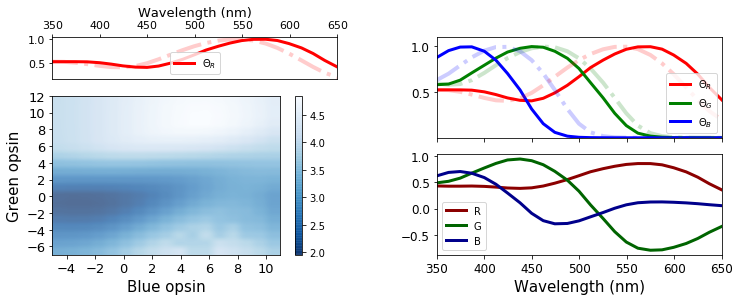

In [275]:
shift_red = 1
side_r = np.array([1])
mixed = 0
Cost_fun = np.loadtxt("Data/Cost_fun_shift_red_"+str(shift_red)+"_side_r_"+str(side_r)+"_mixed_"+str(mixed)+".txt")[:,:-5]

fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(4, 2, hspace = 0.4, wspace = 0.35)
p1 = fig.add_subplot(grid[0,0])
p2 = fig.add_subplot(grid[1:,0])
p3 = fig.add_subplot(grid[:2, 1])
p4 = fig.add_subplot(grid[2:, 1])

fig_p2 = p2.imshow(np.flip(Cost_fun, axis=0), extent = [-5, 11, -7, 12], aspect='auto', cmap = 'Blues_r', alpha=0.7, interpolation='hanning')
idx = np.where(Cost_fun == np.min(Cost_fun))[0]
p2.set_xlabel("Blue opsin", fontsize=15)
p2.set_ylabel("Green opsin", fontsize=15)
p2.xaxis.set_major_locator(MaxNLocator(integer=True))
p2.yaxis.set_major_locator(MaxNLocator(integer=True))
p2.tick_params(labelsize=13)
plt.colorbar(fig_p2, ax=p2)

#-----------

shift_green=0
side_g = 0
shift_blue=2
side_b = 0
shift_red=1
side_r = 1
l_array, red, green, blue = shift_sens(shift_red, shift_blue, shift_green, side_r, side_g, side_b)
p1.plot(l_array, red, color='r', linewidth=3, label = r'$\Theta_{R}$')

p3.plot(l_array, red, color='r', linewidth=3, label = r'$\Theta_{R}$')
p3.plot(l_array, green, color='g', linewidth=3, label = r'$\Theta_{G}$')
p3.plot(l_array, blue, color='b', linewidth=3, label = r'$\Theta_{B}$')

Max_shifted = l_array[np.argmax(red)]
print("l_max_red_shifted" ,Max_shifted)
Max_shifted_ = l_array[np.argmax(green)]
print("l_max_green_shifted" ,Max_shifted_)

shift_green=0
side_g = 2
shift_blue=2
side_b = 2
shift_red=1
side_r = 2

l_array, red, green, blue = shift_sens(shift_red, shift_blue, shift_green, side_r, side_g, side_b)
p1.plot(l_array, red, color='r', linestyle='-.', linewidth=4, alpha=0.2)

p3.plot(l_array, red, color='r', linestyle='-.', linewidth=4, alpha=0.2)
p3.plot(l_array, green, color='g', linestyle='-.', linewidth=4, alpha=0.2)
p3.plot(l_array, blue, color='b', linestyle='-.', linewidth=4, alpha=0.2)

Max_true = l_array[np.argmax(red)]
print("l_max_red" ,Max_true)
Max_true_ = l_array[np.argmax(green)]
print("l_max_green" ,Max_true_)
print("Max_difference", np.abs(Max_shifted-Max_true))
print("Max_difference", np.abs(Max_shifted_-Max_true_))

p1.tick_params(labelsize=11)
p1.xaxis.tick_top()
p1.set_xlabel("Wavelength (nm)", fontsize=13)
p1.xaxis.set_label_position('top') 
p1.set_xlim(350, 650)
p1.legend(fontsize=10)

p3.tick_params(labelsize=12)
p3.set_xticklabels([])
p3.set_ylim(0.001, 1.1)
p3.set_xlim(350, 650)
p3.legend(fontsize=10)

Opt_h1 = np.loadtxt("Data/Optimal_h1.txt")
Opt_h2 = np.loadtxt("Data/Optimal_h2.txt")
Opt_h3 = np.loadtxt("Data/Optimal_h3.txt")
L_array = np.loadtxt("Data/Optimal_l_array.txt")

for i in range(1):
    p4.plot(L_array, Opt_h1[i,:], color='darkred', linewidth=3, label='R')
    p4.plot(L_array, Opt_h2[i,:], color='darkgreen', linewidth=3, label='G')
    p4.plot(L_array, Opt_h3[i,:], color='darkblue', linewidth=3, label='B')
    
p4.tick_params(labelsize=12)
p4.set_xlabel("Wavelength (nm)", fontsize=15)
p4.set_xlim(350, 650)
p4.legend(fontsize=10)
plt.savefig("Plots/Fig_Optimal_opsins.pdf")

### Information part